<a href="https://colab.research.google.com/github/alon-a/NAYA-Project-1/blob/main/NAYA_Project_2_Kickstarter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By: Elio Botton, Anat Shulman, Alon Avramson

# Reviewed Datasests (looking for small file up to 100MB, minimum 10 columns, few hundreds of rows, high usability)

MusicNet Dataset https://www.kaggle.com/imsparsh/musicnet-dataset

1.88 Million US Wildfires https://www.kaggle.com/rtatman/188-million-us-wildfires

Kickstarter Projects https://www.kaggle.com/kemical/kickstarter-projects

Volcanic Eruptions in the Holocene Period 10,000 years https://www.kaggle.com/smithsonian/volcanic-eruptions

Optiver Realized Volatility Prediction https://www.kaggle.com/c/optiver-realized-volatility-prediction/data

Significant Earthquakes, 1965-2016 https://www.kaggle.com/usgs/earthquake-database

Water Quality Dataset https://www.kaggle.com/ozgurdogan646/water-quality-dataset

2019 Airline Delays w/Weather and Airport Detail https://www.kaggle.com/threnjen/2019-airline-delays-and-cancellations

All Space Missions from 1957 https://www.kaggle.com/agirlcoding/all-space-missions-from-1957

Meteorite Landings https://www.kaggle.com/nasa/meteorite-landings

Wine Reviews https://www.kaggle.com/zynicide/wine-reviews 

# Selected Dataset (Kickstarter, 58.03 MB, 375,765 unique value, 15 columns, 7.9 usability, 1448 downloads)

Selected dataset: Kickstarter Projects https://www.kaggle.com/kemical/kickstarter-projects 

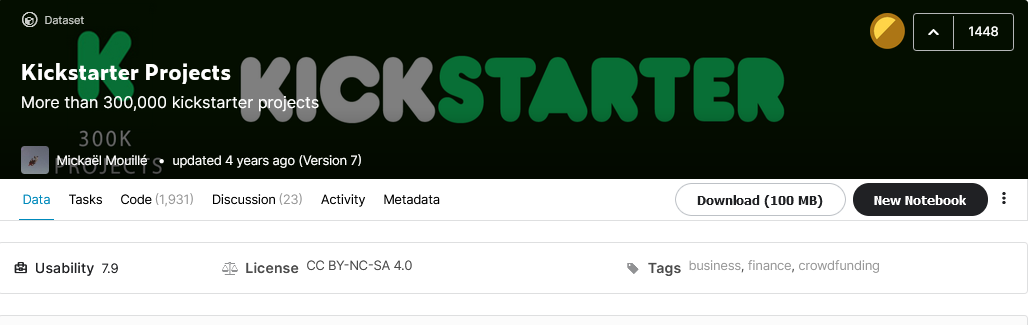

What to expect?

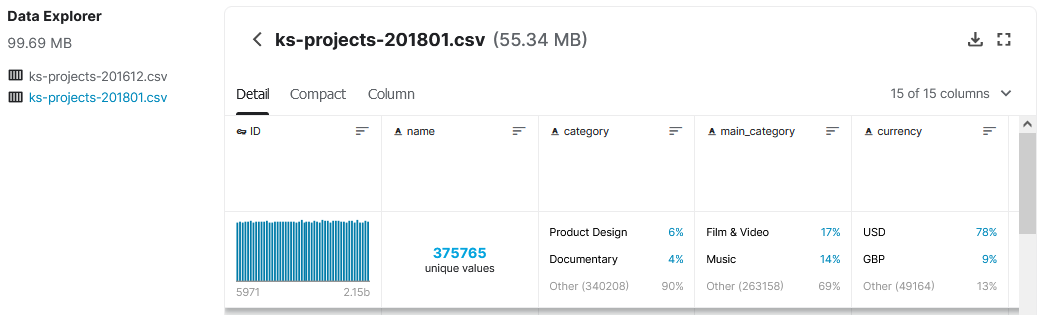

# Top-8 insights
- The website target is to to support Art projects [Kickstarter](https://www.kickstarter.com/about?ref=global-footer)
- Started at 2009, 2009 - 2012 is a rampe-up period, from 2012 to 2018 intense business activity. (Insight-1)
- The website backers invested 3B USD on 134K sucessful projects over 10 years. Out of ~370K projects, ~200K failed. (Insight-2)
- Over 50% of projects failed but about 90% of pledged $$$ were invested in successful projects. (Insight-2)
- The duration of the project does not seem to have a major effect on the succcess rate. (Insight-3)
- The success rate is higher for Arts projects, and this is in line with the decalred intention of the website. The top successful categories are from Art domain (Insight-4).
- US is leading in number of projects by far. Hong Kong (HK) has the highest rate of success, US/GB/CA are the most active countries. (Insight-5)
- The average investment for successful project per backer went up from about USD 70 to about USD 95. In this period the number of backers went up sharply. This means the revenue came from the number of backers. (Insight-6)
- The most successful project asked for 500K, got 20M (Insight-7)
- Film & Video are the leading categories opened, Dance is the least popular(Insight-8a),there are more backers for Games and less for Dance(Insight-8b), backers were more ready to invest in Games, Design and Technology and less in Jurnalism (Insight-8c).  


#Load the file 'ks-projects-201801.csv' from Kaggle

In [2]:
# Load the file 'ks-projects-201801.csv' into Colab after downloading it from Kaggle
import sys

if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()

Saving ks-projects-201801.csv to ks-projects-201801.csv


In [3]:
# Read the file into a dataframe
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import pytz # convert country codes to country names 
plt.rcParams['figure.figsize'] = [15, 8]

ks = pd.read_csv('ks-projects-201801.csv')
ks.sample(5)

ID  ... usd_goal_real
130007  1660073127  ...       6000.00
134663  1683489687  ...       1547.51
352886   867816436  ...        300.00
175327  1891729513  ...        500.00
54529   1277486986  ...       1800.00

[5 rows x 15 columns]

In [4]:
#this is an option to remove all NaN in a singe command and check the effect later
# Remove rows with None values, 

# Read CSV file
#ks_data = pd.read_csv('ks-projects-201801.csv', index_col='ID', parse_dates=['deadline', 'launched'])
#ks_data['Project duration'] = ks_data['deadline'] - ks_data['launched'] 
##row_columns_count = ks_data.count()

# Remove rows with None values
#ks_data.dropna(inplace= True)

# Remove launched date brfore 1/1/2000 (Kickstarter started at 2009) 
#ks_data = ks_data[ks_data['launched'] > datetime(2009, 1, 1)]

##clean_columns_count = ks_data.count()

#add "Duration bins" to dataframe

#bins = [pd.Timedelta(days = 0),pd.Timedelta(days = 15),  pd.Timedelta(days = 30),
        #pd.Timedelta(days = 45),  pd.Timedelta(days = 60), 
        #pd.Timedelta(days = 75),  pd.Timedelta(days = 200)#]

#labels = ['0-15 days', '15-30 Days', '30-45 Days', '45-60 Days', '75-  days']
#ks_data['Duration bins'] = pd.cut((ks_data['deadline'] - ks_data['launched']), bins, labels = labels)
#ks_data.insert (ks_data.columns.get_loc("country")+1, "Country name", ks_data['country'].map(lambda par: pytz.country_names[par]))


# Create dataframe to see to count of dropped values.
#frame = { 'Row': row_columns_count, 'Clean': clean_columns_count, 'Diff': row_columns_count - clean_columns_count, '%': ((row_columns_count - clean_columns_count)/row_columns_count)*100  }
#Data_values_count = pd.DataFrame(frame)
#display(Data_values_count)

# Initial columns analysis 

In [5]:
# What columns are avaiable? 
ks.columns
# Seems to have enough colmns for interesting insights

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [6]:
# Initial columns analysis
catergorial_cols = [ 'category', 'main_category', 'currency','state','country']
free_text_cols = ['name']
date_cols = ['deadline','launched']
money_cols = ['goal','pledged','usd pledged', 'usd_pledged_real', 'usd_goal_real' ]
people_cols = ['backers']
not_used_cols = ['ID']

Open issues to check

In [7]:
# What is the difference between "usd pledged"  and "usd_pledged_real"?(it looks like the relevant col is "usd_pledged_real" )
# Is there a relation between "category" and "main_category"? (we did not find a relatuinship)
# What does the "ID" column refer to? (it looks like this col is internal for the website not relevant for nalysis)

#Data cleaning (1% drop)

In [8]:
# How many lines in the dataset?
# Seems the dataset includes 378,661 lines, this a fair amount of data to get statistics, 
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


Convert colunms to Date

In [9]:
#df['Date']= pd.to_datetime(df['Date'])
ks['deadline'] = pd.to_datetime (ks['deadline'])
ks['launched'] = pd.to_datetime (ks['launched'])
ks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                378661 non-null  int64         
 1   name              378657 non-null  object        
 2   category          378661 non-null  object        
 3   main_category     378661 non-null  object        
 4   currency          378661 non-null  object        
 5   deadline          378661 non-null  datetime64[ns]
 6   goal              378661 non-null  float64       
 7   launched          378661 non-null  datetime64[ns]
 8   pledged           378661 non-null  float64       
 9   state             378661 non-null  object        
 10  backers           378661 non-null  int64         
 11  country           378661 non-null  object        
 12  usd pledged       374864 non-null  float64       
 13  usd_pledged_real  378661 non-null  float64       
 14  usd_

Percentage of missing values

usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter). usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).


In [10]:
ks.isna().sum()/len(ks) * 100

ID                  0.000000
name                0.001056
category            0.000000
main_category       0.000000
currency            0.000000
deadline            0.000000
goal                0.000000
launched            0.000000
pledged             0.000000
state               0.000000
backers             0.000000
country             0.000000
usd pledged         1.002744
usd_pledged_real    0.000000
usd_goal_real       0.000000
dtype: float64

Deleting the 'ID' and 'usd pledged' colunms 

In [11]:

ks.drop(['ID', 'usd pledged'], axis = 1, inplace=True)
#ks.head(5)

In [12]:
ks.shape

(378661, 13)

In [13]:
# Are there any NaN left?
null_data = ks[ks.isna().any(axis=1)]  #Test whether any element is true over requested Pandas axis
null_data

name        category  ... usd_pledged_real usd_goal_real
166851  NaN  Narrative Film  ...           100.00     200000.00
307234  NaN     Video Games  ...           316.05       3224.97
309991  NaN  Product Design  ...             0.00       2500.00
338931  NaN        Painting  ...           220.00      35000.00

[4 rows x 13 columns]

Is data with undefined Project Name  should be cleaned ?

In [14]:
#null_data = ks[ks.isna().name == True]  # Test which rows has NaN name of project
#null_data

These only 4 lines can be dropped

In [15]:
ks.dropna(subset=['name'], axis = 0 , inplace = True)

In [16]:
null_data = ks[ks.isna().name == True]  # Test which rows has NaN name of project
null_data

Empty DataFrame
Columns: [name, category, main_category, currency, deadline, goal, launched, pledged, state, backers, country, usd_pledged_real, usd_goal_real]
Index: []

In [17]:
#ks.head(5)

Let's explore "country" column

It  has missing values: N,0". Is it correlated with the state = "undefined" and number of backers = 0 ?


In [18]:
ks['country'].value_counts()

US      292624
GB       33671
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [19]:
ks.shape

(378657, 13)

In [20]:
ks.dropna(inplace= True)

In [21]:
# dropna did not clean the ''N,0"' countries
ks.shape

(378657, 13)

In [22]:
display (ks[ks['country'] == 'N,0"'])
ks = ks[ks['country'] != 'N,0"']
ks.shape

name  ... usd_goal_real
169                         STREETFIGHTERZ WHEELIE MURICA  ...       6500.00
328                           Duncan Woods - Chameleon EP  ...       3211.53
632             The Making of Ashley Kelley's Debut Album  ...       3500.00
647                          Butter Side Down Debut Album  ...       6000.00
749                               Chase Goehring debut EP  ...       3000.00
...                                                   ...  ...           ...
378233  EQUUS International Film Festival®, all-equine...  ...       7500.00
378303                            Emily 2050 - Short Film  ...       2752.04
378434                             Matthew Stephens Music  ...       5000.00
378585     Lady Vendredi: Afrofuturist concept 12 inch EP  ...       3080.81
378588                     Jeune auteur a besoin de vous!  ...       1710.08

[3797 rows x 13 columns]

(374860, 13)

Lost (378657 - 374860) = 3,797 lines 

In [23]:
ks['country'].value_counts()

US    292624
GB     33671
CA     14756
AU      7839
DE      4171
FR      2939
IT      2878
NL      2868
ES      2276
SE      1757
MX      1752
NZ      1447
DK      1113
IE       811
CH       761
NO       708
HK       618
BE       617
AT       597
SG       555
LU        62
JP        40
Name: country, dtype: int64

In [24]:
# Adding the country name using the country code
ks.insert (ks.columns.get_loc("country")+1, "Country name", ks['country'].map(lambda par: pytz.country_names[par]))
ks

name  ... usd_goal_real
0                         The Songs of Adelaide & Abullah  ...       1533.95
1           Greeting From Earth: ZGAC Arts Capsule For ET  ...      30000.00
2                                          Where is Hank?  ...      45000.00
3       ToshiCapital Rekordz Needs Help to Complete Album  ...       5000.00
4       Community Film Project: The Art of Neighborhoo...  ...      19500.00
...                                                   ...  ...           ...
378656  ChknTruk Nationwide Charity Drive 2014 (Canceled)  ...      50000.00
378657                                          The Tribe  ...       1500.00
378658  Walls of Remedy- New lesbian Romantic Comedy f...  ...      15000.00
378659                           BioDefense Education Kit  ...      15000.00
378660                  Nou Renmen Ayiti!  We Love Haiti!  ...       2000.00

[374860 rows x 14 columns]

Delete duplicates

In [25]:
ks[ks.duplicated()]
# Yey! no duplications !

Empty DataFrame
Columns: [name, category, main_category, currency, deadline, goal, launched, pledged, state, backers, country, Country name, usd_pledged_real, usd_goal_real]
Index: []

Should projects with dates earlier than 2009 be dropped?  (kickstarter project initiated at 2009)

In [26]:
ks.info()
ks.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              374860 non-null  object        
 1   category          374860 non-null  object        
 2   main_category     374860 non-null  object        
 3   currency          374860 non-null  object        
 4   deadline          374860 non-null  datetime64[ns]
 5   goal              374860 non-null  float64       
 6   launched          374860 non-null  datetime64[ns]
 7   pledged           374860 non-null  float64       
 8   state             374860 non-null  object        
 9   backers           374860 non-null  int64         
 10  country           374860 non-null  object        
 11  Country name      374860 non-null  object        
 12  usd_pledged_real  374860 non-null  float64       
 13  usd_goal_real     374860 non-null  float64       
dtypes: d

(374860, 14)

Clean the lines with irrelevant dates

In [27]:
# Select launched date after  1/1/2009 (Kickstarter started at 2009) 
ks_data = ks[ks['launched'] > datetime(2009, 1, 1)]
ks_data.info()
ks.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374853 entries, 0 to 378660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              374853 non-null  object        
 1   category          374853 non-null  object        
 2   main_category     374853 non-null  object        
 3   currency          374853 non-null  object        
 4   deadline          374853 non-null  datetime64[ns]
 5   goal              374853 non-null  float64       
 6   launched          374853 non-null  datetime64[ns]
 7   pledged           374853 non-null  float64       
 8   state             374853 non-null  object        
 9   backers           374853 non-null  int64         
 10  country           374853 non-null  object        
 11  Country name      374853 non-null  object        
 12  usd_pledged_real  374853 non-null  float64       
 13  usd_goal_real     374853 non-null  float64       
dtypes: d

(374860, 14)

Getting the feel of the columns after cleaning

In [28]:
ks.main_category.value_counts()
display(ks.main_category.nunique())
display(ks.main_category.unique())

ks.currency.value_counts()
display(ks.currency.nunique())
display(ks.currency.unique())

ks.state.value_counts()
display(ks.state.nunique())
display(ks.state.unique())

ks.country.value_counts
display(ks.country.nunique())
display(ks.country.unique())

15

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

14

array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

5

array(['failed', 'canceled', 'successful', 'live', 'suspended'],
      dtype=object)

22

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG', 'JP'],
      dtype=object)

Set a few time periods (bins) and add a 'Duration bins' column

In [29]:
bins = [pd.Timedelta(days = 0), pd.Timedelta(days = 15),  pd.Timedelta(days = 30),
        pd.Timedelta(days = 45),  pd.Timedelta(days = 60), 
        pd.Timedelta(days = 75),  pd.Timedelta(days = 200)
]

labels = ['0-15 days', '15-30 Days', '30-45 Days', '45-60 Days', '60-75 Days', '75-  days']
ks_data['Duration bins'] = pd.cut((ks_data['deadline'] - ks_data['launched']), bins, labels = labels)
ks_data.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


name  ... Duration bins
0                    The Songs of Adelaide & Abullah  ...    45-60 Days
1      Greeting From Earth: ZGAC Arts Capsule For ET  ...    45-60 Days
2                                     Where is Hank?  ...    30-45 Days
3  ToshiCapital Rekordz Needs Help to Complete Album  ...    15-30 Days
4  Community Film Project: The Art of Neighborhoo...  ...    45-60 Days

[5 rows x 15 columns]

7 lines with earlier dates were deleted

#Interesting initial quetions
- Which main_catergory is most popular (pledged / number of projects / backers)
 - Which category inside the main_catergory is intergesting
- Average backer support / per project, per category
- Fastest vs longest time to raise capital
- % of canceled projects, which categories or countries
- % of failed projects, which categories or countries


#(Insight-8a) Which main category is most popular when opening a new project ? 

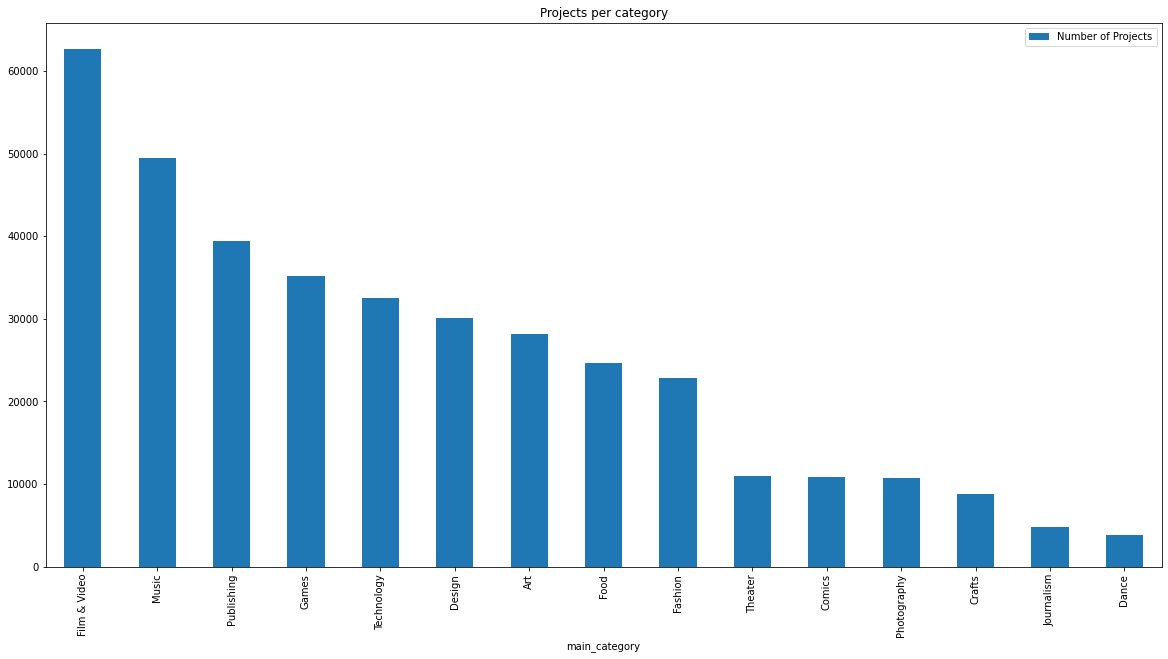

In [30]:
ks_main_categories = ks.groupby(['main_category']).apply(lambda grp: pd.Series(len(grp), index=['Number of Projects'])).sort_values(by='Number of Projects', ascending=False)
#ks_main_categories = ks_main_categories.sort_values(by='Number of Projects', ascending=False)
#ks_main_categories
ks_main_categories.plot(kind='bar', figsize=[20,10], title='Projects per category')

Insight: Film & Video are the leading categories opened. Dance is the least popular.

#(Insight-8b) Which main category backers love most ? 

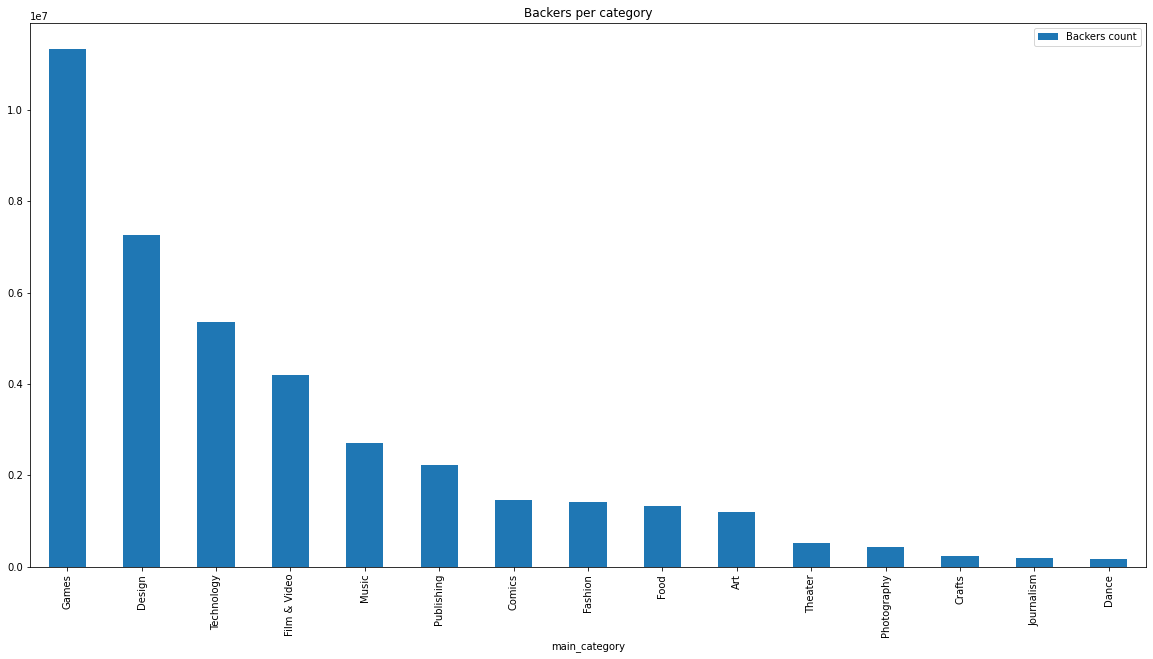

In [31]:
ks_main_categories_backers = ks.groupby(['main_category']).apply(lambda grp: pd.Series(sum(grp['backers']), index=['Backers count'])).sort_values(by='Backers count', ascending=False)
#ks_main_categories_backers = ks_main_categories_backers.sort_values(by='Backers count', ascending=False)
#ks_main_categories_backers
ks_main_categories_backers.plot(kind='bar', figsize=[20,10], title='Backers per category')

Insight: there are more backers for Games and less for Dance.

#(Insight-8c) Which main category backers were most ready to put money on ? (total pledge per category)

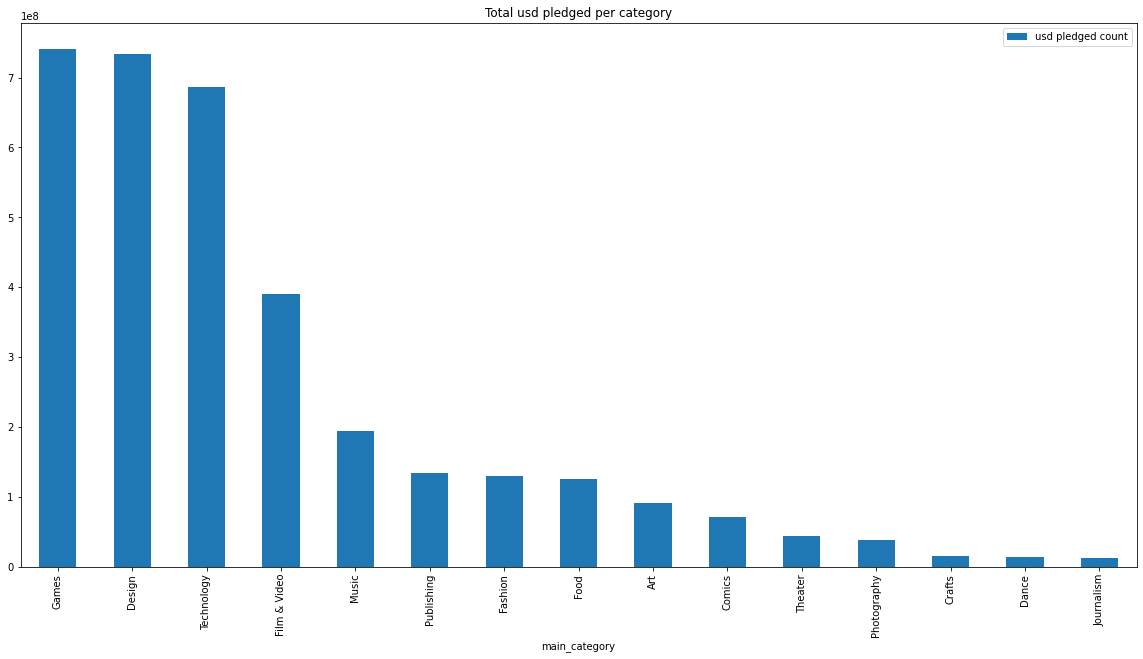

In [32]:
ks_main_categories_pledged = ks.groupby(['main_category']).apply(lambda grp: pd.Series(sum(grp['usd_pledged_real']), index=['usd pledged count']))
ks_main_categories_pledged = ks_main_categories_pledged.sort_values(by='usd pledged count', ascending=False)
#ks_main_categories_pledged
ks_main_categories_pledged.plot(kind='bar', figsize=[20,10], title='Total usd pledged per category')

Insight: backers were more ready to invest in Games, Design and Technology and less in Jurnalism 

# Anlyzing the most popular main category

The most popular category is:  Games


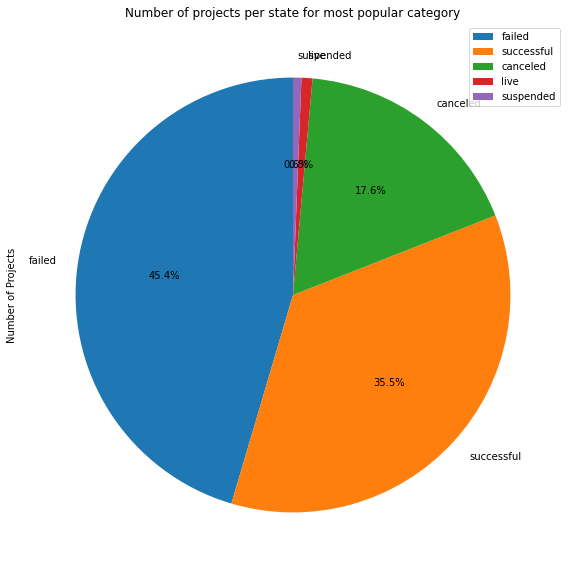

In [33]:
ks_main_categories_pledged_first = ks_main_categories_pledged.iloc[0]
most_popular_cat = (ks_main_categories_pledged_first.name)
print('The most popular category is: ',most_popular_cat )
ks_main_category_game_project = ks[ks.main_category==most_popular_cat].groupby('state').apply(lambda grp: pd.Series(len(grp) , index=['Number of Projects']))
ks_main_category_game_project = ks_main_category_game_project.sort_values(by='Number of Projects', ascending=False)
ks_main_category_game_project
ks_main_category_game_project.plot(kind='pie', y='Number of Projects', figsize=[15,10], title='Number of projects per state for most popular category', startangle=90, autopct='%1.1f%%');

Insight: Backers that were willing to invest in Games projects, found that these projects failed in 45% of the cases and succeeded in 35% of the cases.

# Anlyzing the less popular main category

The less popular category is:  Journalism


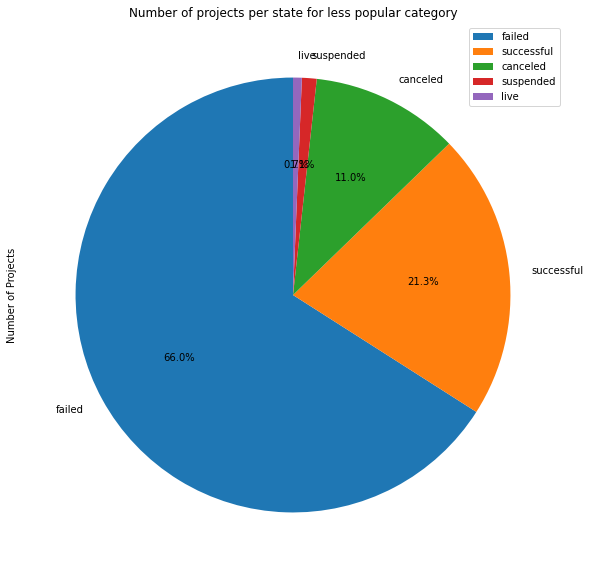

In [34]:
ks_main_categories_pledged_last = ks_main_categories_pledged.iloc[(len(ks_main_categories_pledged)-1)]
less_popular_cat = (ks_main_categories_pledged_last.name)
print('The less popular category is: ',less_popular_cat )
ks_main_category_dance_projects = ks[ks.main_category==less_popular_cat].groupby('state').apply(lambda grp: pd.Series(len(grp) , index=['Number of Projects']))
ks_main_category_dance_projects
ks_main_category_dance_projects = ks_main_category_dance_projects.sort_values(by='Number of Projects', ascending=False)
ks_main_category_dance_projects
ks_main_category_dance_projects.plot(kind='pie', y='Number of Projects', figsize=[15,10], title='Number of projects per state for less popular category', startangle=90, autopct='%1.1f%%');

Insight: Backers that were willing to invest in Jurnalism projects, found that these projects failed in 66% of the cases and succeeded in 21% of the cases.

# What is the average backer's support per main category ?

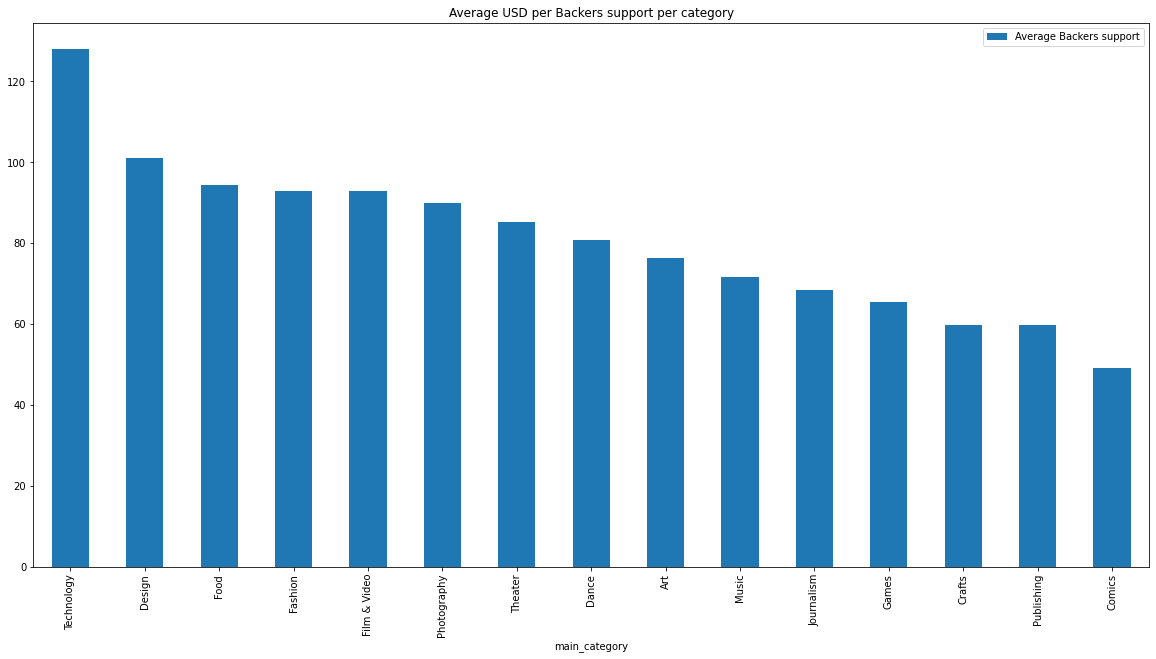

In [35]:
ks_main_categories_backers = ks.groupby(['main_category']).apply(lambda grp: pd.Series( (sum(grp['usd_pledged_real']) / sum(grp['backers'])), index=['Average Backers support']))
ks_main_categories_backers = ks_main_categories_backers.sort_values(by='Average Backers support', ascending=False)
#ks_main_categories_backers
ks_main_categories_backers.plot(kind='bar', figsize=[20,10], title='Average USD per Backers support per category')

Insight: Technology gets the most invetment of USD per backer

In [36]:
#ks.boxplot(column=['backers'], by=['state'], figsize=(10,8), grid = False)


# Failed projects per category

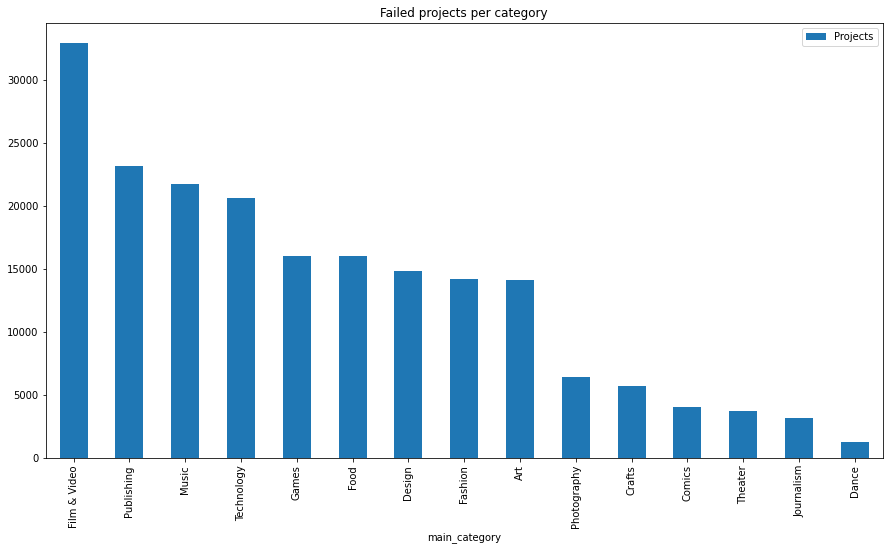

In [37]:
failed_projects = ks[ks['state'] == 'failed' ]
failed_projects.groupby(['main_category']).apply(lambda grp: pd.Series((len(grp)), index = ['Projects'])).sort_values(by='Projects', ascending=False).plot(kind = 'bar', title = 'Failed projects per category')

Insight: Film & Video are projects with the most potential to fail. Even if the main target of this website was to support Art. Dance is the category that is less likely to fail.

#Deeper Analysis

#(Insight-2) Projects Analysis 

In [38]:
total_count = len(ks_data)
total_goal_sum = sum(ks_data['usd_goal_real'])
total_backers_sum = sum(ks_data['backers'])
total_pledged_sum = sum(ks_data['usd_pledged_real'])

ks_state_grouped = ks_data.groupby(['state']).apply(lambda grp: pd.Series([f"{len(grp):8,d}", 
                                                                           f'{((len(grp)/total_count) * 100):5.2F} %',
                                                                           f"{(grp['usd_goal_real'].sum() / 1000000):>8,.2F} $M",
                                                                           f"{((grp['usd_goal_real'].sum()/total_goal_sum) * 100):5.2F} %",
                                                                           f"{grp['backers'].sum():10,d}",
                                                                           f"{(grp['backers'].sum()/total_backers_sum * 100):5.2F} %",
                                                                           f"{(grp['usd_pledged_real'].sum() / 1000000):>8,.2F} $M",
                                                                           f"{((grp['usd_pledged_real'].sum()/total_pledged_sum) * 100):5.2F} %",
                                                                            ],
        index=['Projects', '  % of Projects', ' Total Goal ($M)', '% of Goal', ' Total Backers', ' % of Backers ', '     Pledged ($M)', '  % of Pledged '])).sort_values(by='Projects', ascending=False)

ks_state_grouped


Projects   % of Projects  ...      Pledged ($M)   % of Pledged 
state                                 ...                                  
failed       197,611         52.72 %  ...         261.06 $M          7.64 %
successful   133,851         35.71 %  ...       3,033.66 $M         88.73 %
canceled      38,751         10.34 %  ...          90.73 $M          2.65 %
live           2,798          0.75 %  ...          16.43 $M          0.48 %
suspended      1,842          0.49 %  ...          17.17 $M          0.50 %

[5 rows x 8 columns]

Insights: project success rate about 35%. Most of the backers (88%)  supported successfull projects. Total 3B$ were invetsed in 134,000 projects over 10 years (2009-2018). The demand from backers is higher about 10 times than possible successful projects.

Selecting only the relevant states for further analysis.
- Live are on-going projects
- suspended are very few, with unclear situation

In [39]:
ks_data_reduced_states = ks_data[ (ks_data['state'] == 'failed') | 
                                  (ks_data['state'] == 'canceled') | 
                                  (ks_data['state'] == 'successful')]

#Categories per main category

In [40]:
ks_state_grouped = ks_data.groupby(['main_category']).apply(lambda grp: pd.Series([', '.join(set(grp['category'])),
                                                                                   len(set(grp['category']))],
                                                                                  index=['Sub Category', 'Count'])).sort_index()

ks_state_grouped

Sub Category  Count
main_category                                                          
Art            Painting, Public Art, Illustration, Sculpture,...     13
Comics         Webcomics, Anthologies, Events, Graphic Novels...      6
Crafts         Pottery, Weaving, Crochet, DIY, Printing, Cand...     15
Dance          Workshops, Residencies, Performances, Dance, S...      5
Design         Design, Civic Design, Typography, Product Desi...      7
Fashion        Childrenswear, Fashion, Couture, Accessories, ...      9
Film & Video   Romance, Shorts, Horror, Fantasy, Documentary,...     20
Food           Food Trucks, Farms, Small Batch, Community Gar...     13
Games          Video Games, Mobile Games, Tabletop Games, Pla...      8
Journalism           Audio, Journalism, Web, Print, Video, Photo      6
Music          Music, Blues, Pop, Kids, Indie Rock, Punk, Cou...     19
Photography    Fine Art, Nature, Photobooks, Animals, Photogr...      7
Publishing     Art Books, Comedy, Publishing, Calendars, Lite...     18
Technology     3D Printing, Software, Wearables, Camera Equip...     16
Theater        Theater, Comedy, Immersive, Musical, Festivals...      8

Insight: the category and main category do not seem to be related, continuing with the main category column only

#(Insight-4) Success rate by Main Category 

Count                   Total Count % Successful
state         canceled failed successful                         
main_category                                                    
Dance              163   1235       2338        3736    62.580300
Theater            607   3708       6534       10849    60.226749
Comics             842   4036       5842       10720    54.496269
Music             3299  21696      24105       49100    49.093686
Art               2221  14130      11510       27861    41.312229
Film & Video      5742  32891      23612       62245    37.933971
Games             6199  16002      12518       34719    36.055186
Design            4151  14814      10549       29514    35.742360
Publishing        3601  23113      12300       39014    31.527144
Photography        986   6384       3305       10675    30.960187
Food              2209  15969       6085       24263    25.079339
Fashion           2650  14181       5593       22424    24.942026
Crafts             843   5703       2115        8661    24.419813
Journalism         523   3136       1012        4671    21.665596
Technology        4715  20613       6433       31761    20.254400

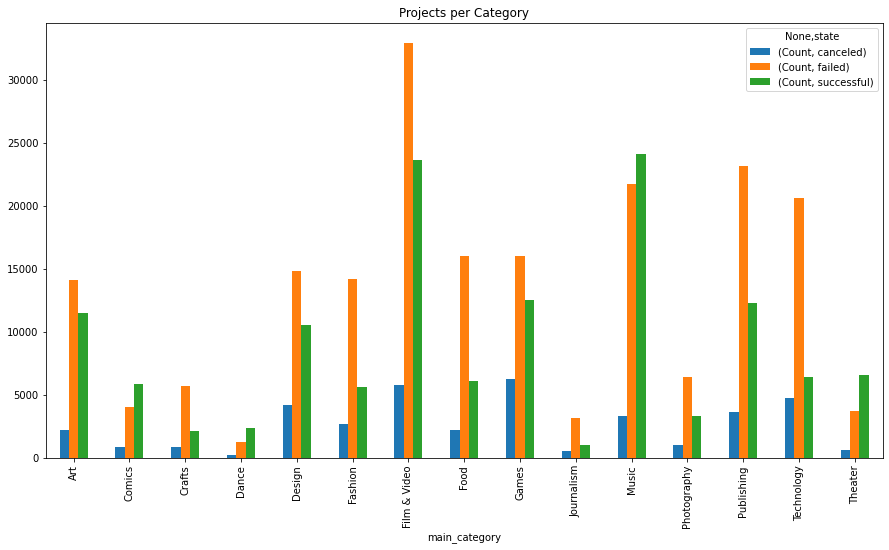

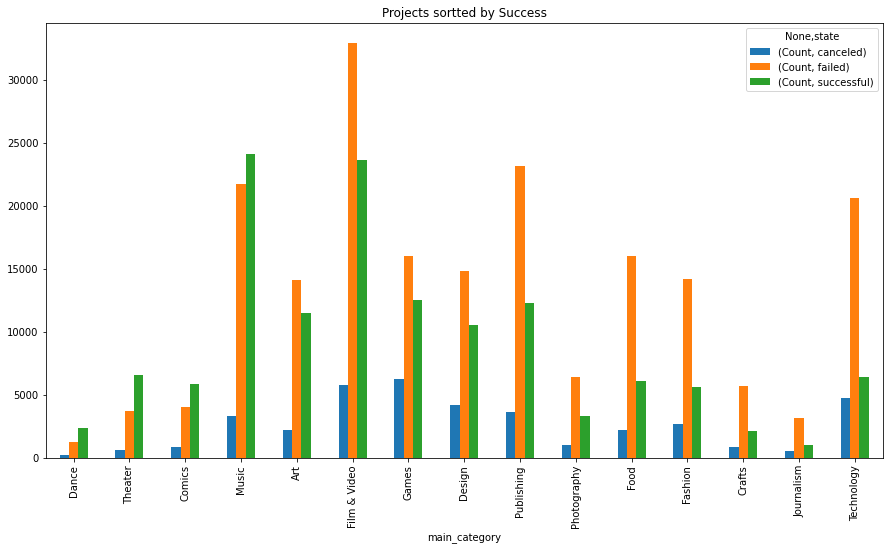

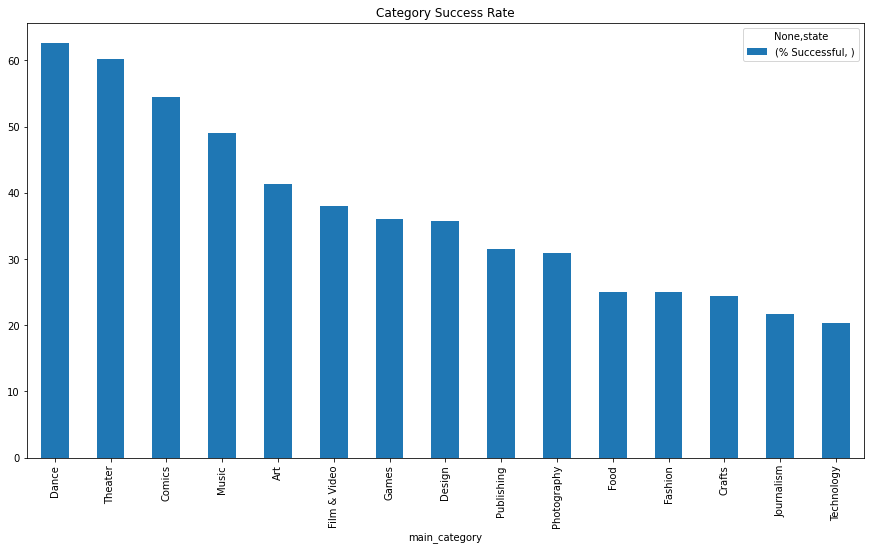

In [41]:
ks_data_for_category_grouping = ks_data_reduced_states.copy()
ks_data_for_category_grouping['Month Year'] = ks_data_reduced_states['launched'].dt.to_period('M')

ks_category_grouped = ks_data_for_category_grouping.groupby(['main_category', 'state']).apply(lambda grp: pd.Series([len(grp)], 
                                                                                                                  index=['Count']))
#display(ks_category_grouped)
ks_category_grouped.unstack(-1).plot(kind='bar', title = 'Projects per Category')
ks_category_grouped_unstack = ks_category_grouped.unstack(-1)
#ks_category_grouped.unstack(-1)

ks_category_grouped_unstack.loc[:,'Total Count'] = ks_category_grouped_unstack.sum(numeric_only=True, axis=1)
#display(ks_category_grouped_unstack)
ks_category_grouped_unstack['% Successful'] = (ks_category_grouped_unstack[('Count','successful')] / ks_category_grouped_unstack[('Total Count','')]) * 100
ks_category_grouped_unstack.sort_values(by='% Successful', ascending=False)
#display(ks_category_grouped_unstack.sort_values(by='Total Count', ascending=False))

ks_category_grouped_unstack = ks_category_grouped_unstack.sort_values(by='% Successful', ascending=False)

display(ks_category_grouped_unstack)
ks_category_grouped_unstack.plot(kind='bar', y=[('Count', 'canceled'), ('Count', 'failed'), ('Count', 'successful')], title = 'Projects sortted by Success')
ks_category_grouped_unstack.plot(kind='bar', y=[('% Successful','')], title = 'Category Success Rate')
#All in one option does not make it clear
#ks_category_grouped_unstack.plot(kind='bar', y=[('% Successful', ''), ('Count', 'canceled'), ('Count', 'failed'), ('Count', 'successful'), ] , secondary_y=[('% Successful', '')])


Insights: the success rate is higher for Arts projects, and this is in line with the decalred intention of the website.

#(Insight-1) Kickstart overall activities 

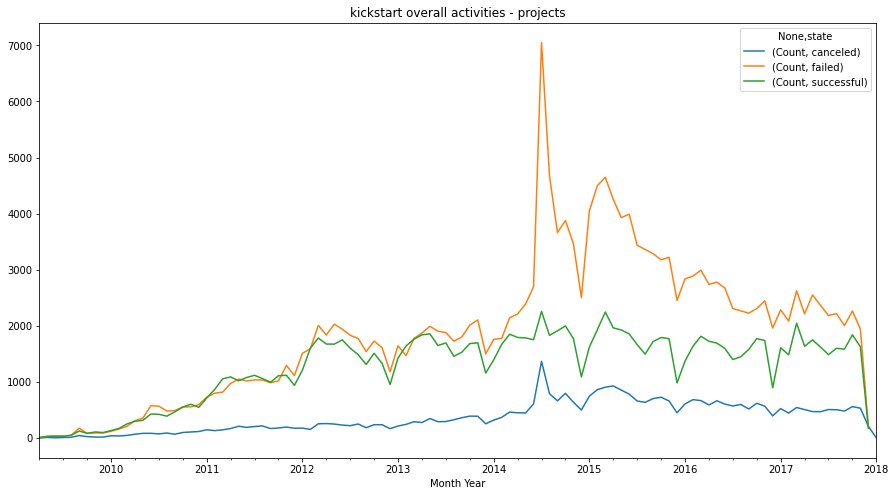

In [42]:
# Overall (project count)
ks_data_for_date_grouping = ks_data_reduced_states.copy()
ks_data_for_date_grouping['Month Year'] = ks_data_reduced_states['launched'].dt.to_period('M')

ks_date_count_grouped = ks_data_for_date_grouping.groupby(['Month Year', 'state']).apply(lambda grp: pd.Series([len(grp)], index=['Count']))
ks_date_count_grouped.unstack(-1).plot(title='kickstart overall activities - projects')
#display(ks_date_count_grouped.unstack(-1))

Insights: from 2009 to 2012 - rampe up period. from 2012 to 2014, a steady work, in 2014 a boost in projects but most of them failed, maybe this is an effort of the website to encourage investors. from 2015 till 2018 steady work.

#(Insight-5) Projects by Country 

Count                    Total Count % Successful
state   canceled  failed successful                         
country                                                     
AT            91     378        107         576    18.576389
AU          1065    4606       2010        7681    26.168468
BE            74     371        152         597    25.460637
CA          2138    8236       4134       14508    28.494624
CH            84     465        187         736    25.407609
DE           621    2499        937        4057    23.095884
DK           157     566        360        1083    33.240997
ES           331    1381        492        2204    22.323049
FR           353    1612        908        2873    31.604595
GB          3761   17386      12067       33214    36.331065
HK            87     261        216         564    38.297872
IE           110     476        207         793    26.103405
IT           406    1930        439        2775    15.819820
JP             8      16          7          31    22.580645
LU             4      38         19          61    31.147541
MX           221    1015        396        1632    24.264706
NL           396    1794        617        2807    21.980762
NO           112     420        162         694    23.342939
NZ           151     826        448        1425    31.438596
SE           209    1000        509        1718    29.627474
SG            67     276        178         521    34.165067
US         28305  152059     109299      289663    37.733159

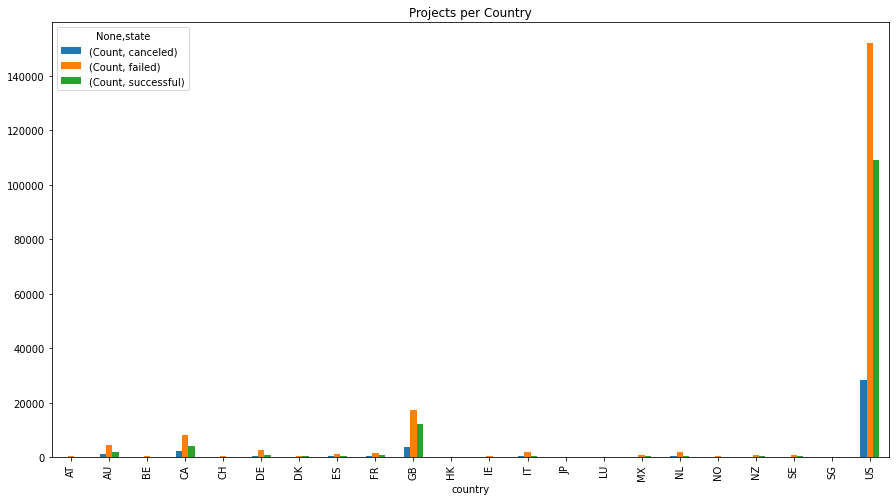

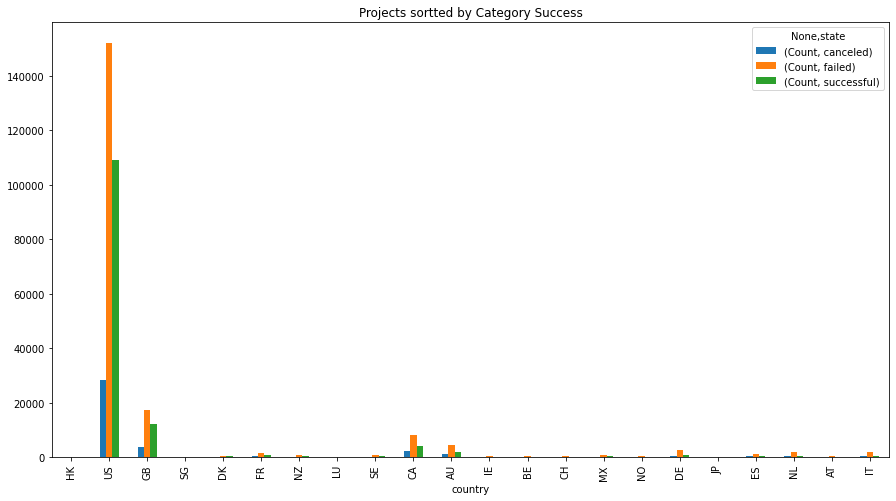

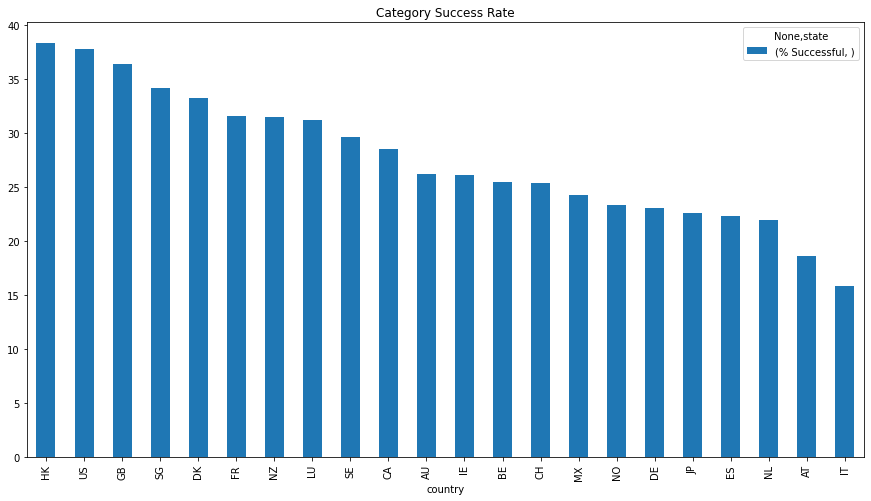

In [43]:
ks_data_for_country_grouping = ks_data_reduced_states.copy()
ks_country_grouped = ks_data_for_country_grouping.groupby(['country', 'state']).apply(lambda grp: pd.Series([len(grp)], 
                                                                                      index=['Count']))
#display(ks_country_grouped)
ks_country_grouped.unstack(-1).plot(kind='bar', title = 'Projects per Country')
ks_country_grouped_unstack = ks_country_grouped.unstack(-1)
#display(ks_country_grouped_unstack)
ks_country_grouped_unstack.loc[:,'Total Count'] = ks_country_grouped_unstack.sum(numeric_only=True, axis=1)

ks_country_grouped_unstack['% Successful'] = (ks_country_grouped_unstack[('Count','successful')] / ks_country_grouped_unstack[('Total Count','')]) * 100
ks_country_grouped_unstack.sort_values(by='% Successful', ascending=False)
display(ks_country_grouped_unstack)
ks_country_grouped_unstack = ks_country_grouped_unstack.sort_values(by='% Successful', ascending=False)

ks_country_grouped_unstack.plot(kind='bar', y=[('Count', 'canceled'), ('Count', 'failed'), ('Count', 'successful')], title = 'Projects sortted by Category Success')
ks_country_grouped_unstack.plot(kind='bar', y=[('% Successful','')], title = 'Category Success Rate')

Insight:  US is leading in projects by far. Hong Kong (HK) has the highest rate of success, US/GB/CA are the most active countries. 

#(Insight-3) Projects by Duration 

Count                    Total Count % Successful
state         canceled  failed successful                         
Duration bins                                                     
0-15 days         1280    8591       8693       18564    46.827192
15-30 Days       21246  116310      77687      215243    36.092695
30-45 Days        9252   39504      34195       82951    41.223132
45-60 Days        6340   30251      11407       47998    23.765574
60-75 Days         192    1070        876        2138    40.972872
75-  days          441    1885        993        3319    29.918650

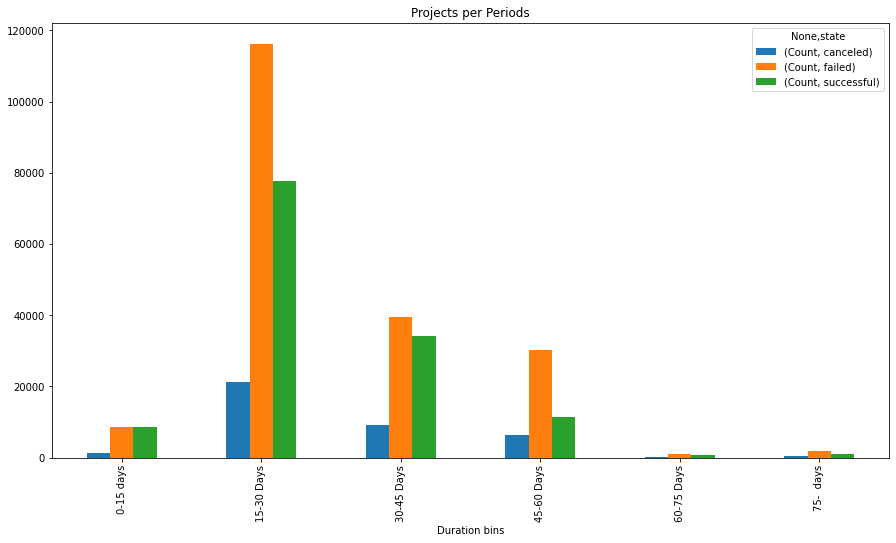

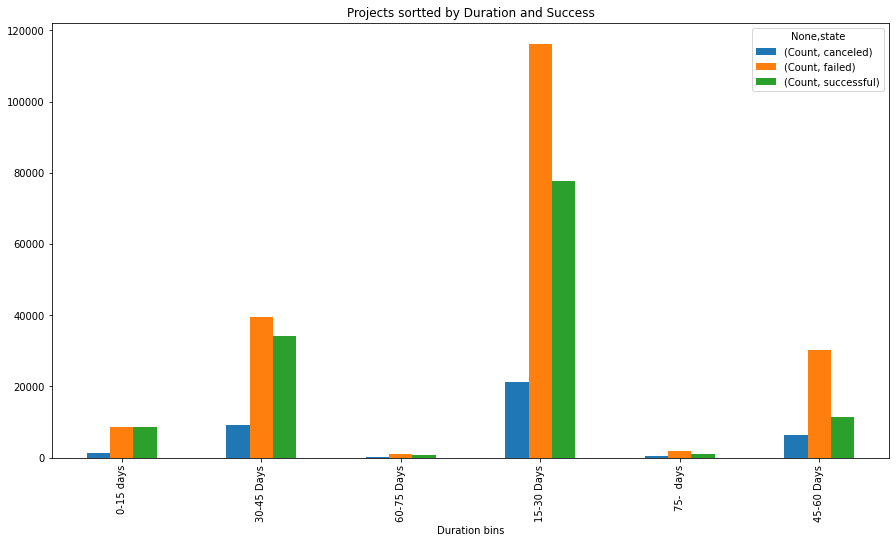

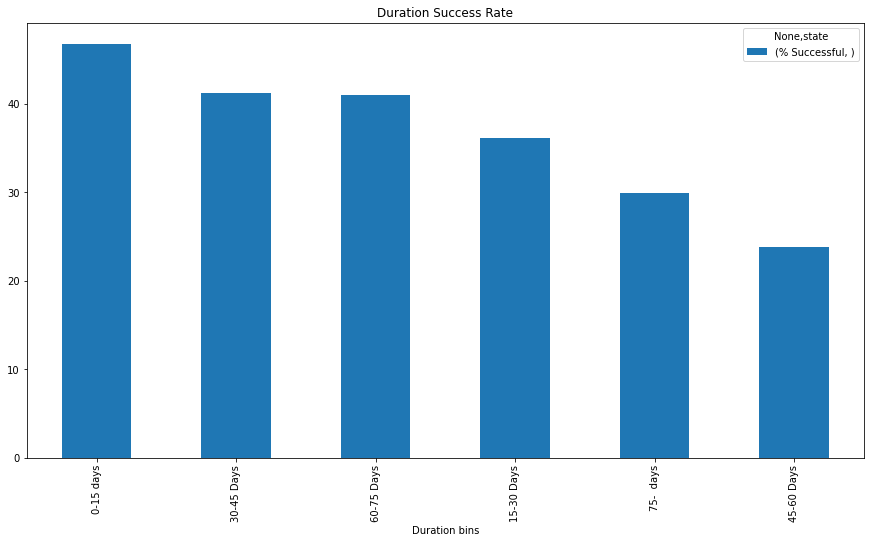

In [44]:
ks_data_for_duration_grouping = ks_data_reduced_states.copy()
ks_duration_grouped = ks_data_for_duration_grouping.groupby(['Duration bins', 'state']).apply(lambda grp: pd.Series([len(grp)], 
                                                                                    index=['Count']))
#display (ks_duration_grouped)
ks_duration_grouped.unstack(-1).plot(kind='bar', title = 'Projects per Periods')
ks_duration_grouped_unstack = ks_duration_grouped.unstack(-1)

ks_duration_grouped_unstack.loc[:,'Total Count'] = ks_duration_grouped_unstack.sum(numeric_only=True, axis=1)
ks_duration_grouped_unstack['% Successful'] = (ks_duration_grouped_unstack[('Count','successful')] / ks_duration_grouped_unstack[('Total Count','')]) * 100
display(ks_duration_grouped_unstack)

ks_duration_grouped_unstack = ks_duration_grouped_unstack.sort_values(by='% Successful', ascending=False)

ks_duration_grouped_unstack.plot(kind='bar', y=[('Count', 'canceled'), ('Count', 'failed'), ('Count', 'successful')], title = 'Projects sortted by Duration and Success')
ks_duration_grouped_unstack.plot(kind='bar', y=[('% Successful','')], title = 'Duration Success Rate')

Insight: most projects are open for 2 weeks, however the success rate is about the same for all periods, meaning the duration has only a small effect on the success. The most successful period is 15-30 days.

Q. what is the most popular category open for two weeks and a month periods?

# Projects Goal vs Pledged Scatter plot 

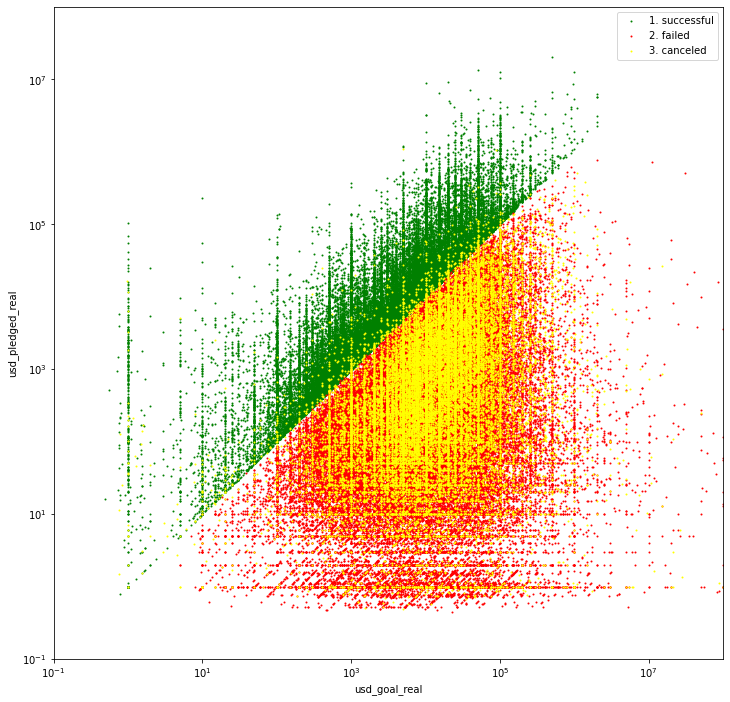

In [45]:
ig, ax = plt.subplots(figsize=(12, 12))


colors = {'2. failed': 'red', '1. successful': 'green', '3. canceled': 'yellow'}
grouped = ks_data_reduced_states.replace({"state": {'successful' : '1. successful', 'failed': '2. failed', 'canceled': '3. canceled'}}).groupby(by='state')

for key, group in grouped:
  group.plot(ax=ax, kind='scatter', loglog=True,
                            color=colors[key], label=key, s=1,
                            x='usd_goal_real', xlim=(10**(-1), 10**8),
                            y='usd_pledged_real', ylim=(10**(-1), 10**8))
plt.show()

Insight: the website is fair. some projects that reached the goal were still canceled. the overall pledged numbers were higher than the goals. projects that did not reach the goal failed.

There are 197611 failed projects 
There are 133851 successful projects


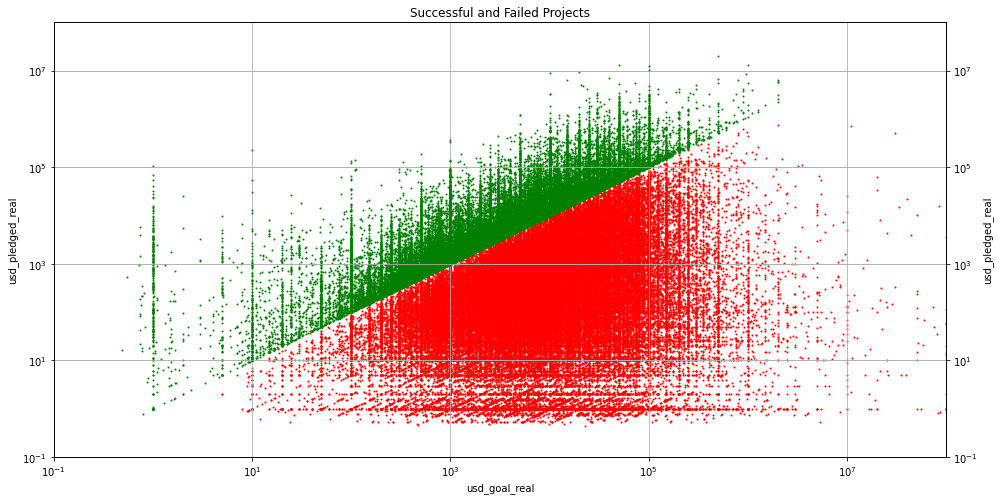

In [46]:
#fig = plt.figure()
#ax = fig.gca()
#plt.figure(figsize=(16,8))
fig, ax1 = plt.subplots()

#ks_data_reduced_states.plot(kind = 'scatter',  x='usd_goal_real',y='usd_pledged_real', figsize=(16, 8 ) )
failed = ks_data_reduced_states[ks_data_reduced_states.state == 'failed']
succeeded = ks_data_reduced_states[ks_data_reduced_states.state == 'successful']
#ks_data_reduced_states_scatter = ks_data_reduced_states[['state','usd_pledged_real','usd_goal_real' ]]
#display(ks_data_reduced_states_scatter)
#ks_data_reduced_states_scatter.plot(kind = 'scatter',  x='usd_goal_real',y='usd_pledged_real', logx = False, figsize=(16, 8 ) )
print(f'There are {len(failed)} failed projects ')
failed.plot(ax = ax1, kind = 'scatter',  x='usd_goal_real', xlim=(10**(-1), 10**8),y='usd_pledged_real', ylim=(10**(-1), 10**8), figsize=(16, 8 ), color='r',grid=True, loglog =True, s=1 )
ax2 = ax1.twinx()
print(f'There are {len(succeeded)} successful projects')
succeeded.plot(ax = ax2,kind = 'scatter',  x='usd_goal_real', xlim=(10**(-1), 10**8),y='usd_pledged_real',ylim=(10**(-1), 10**8), figsize=(16, 8 ), secondary_y = True, color='g',grid=True, title = 'Successful and Failed Projects', loglog =True, s=1)
plt.show()

# Financial Analysis

#Projects activities in pledged numbers

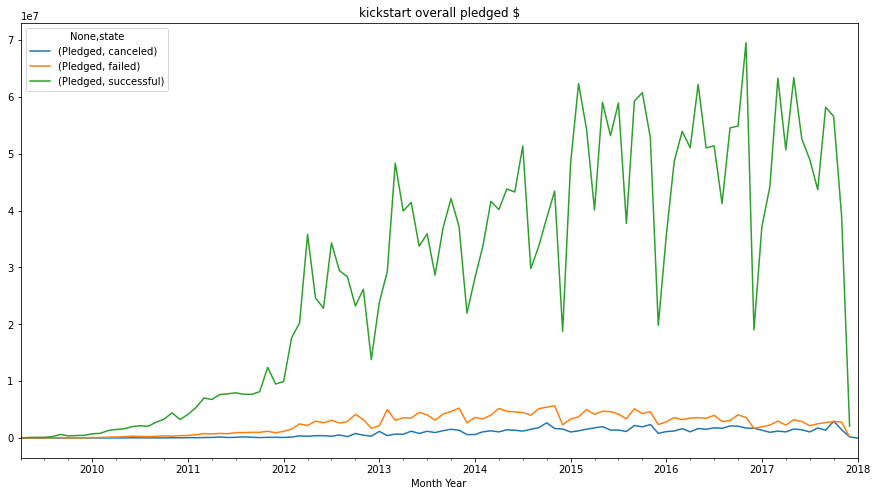

In [47]:
# Overall (pledged sum)
ks_date_pledged = ks_data_for_date_grouping.groupby(['Month Year', 'state']).apply(lambda grp: pd.Series([grp['usd_pledged_real'].sum()], index=['Pledged']))
ks_date_pledged.unstack(-1).plot(title='kickstart overall pledged $' ) #, logy=True);
# display(ks_date_grouped.unstack(-1))

Insight: More and more investors are willing to invest but only successfull projects win. There is a drop in investment every year end, let's check it.

#Periodic investment pattern analysis (end of year fall)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


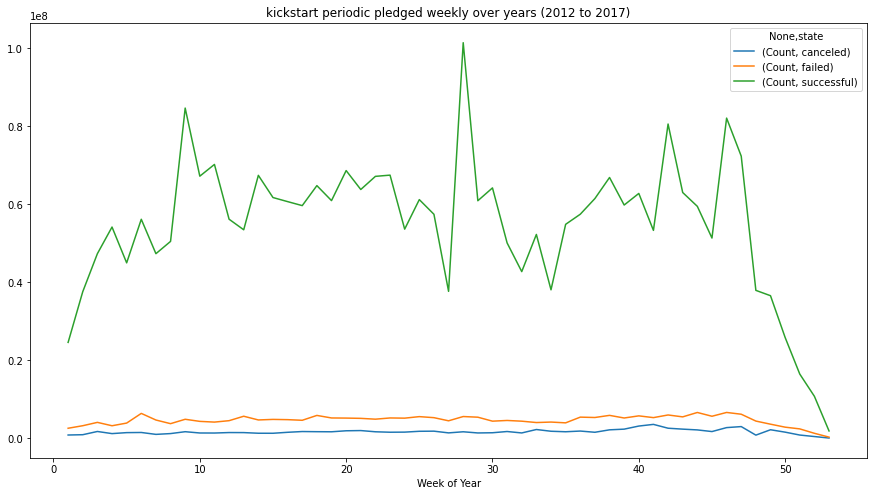

In [48]:
# Periodic pledged weekly over years (start of 2012 till end of 2017)
ks_weeks_grouping = ks_data_reduced_states.copy()
ks_weeks_grouping['Week of Year'] = pd.DatetimeIndex(ks_weeks_grouping['launched']).weekofyear
ks_weeks_grouping = ks_weeks_grouping[(ks_weeks_grouping['launched'] > datetime(2012, 1, 1)) & (ks_weeks_grouping['launched'] < datetime(2018, 1, 1))]

ks_weeks_grouping = ks_weeks_grouping.groupby(['Week of Year', 'state']).apply(lambda grp: pd.Series([grp['usd_pledged_real'].sum()], index=['Count']))
ks_weeks_grouping.unstack(-1).plot(title='kickstart periodic pledged weekly over years (2012 to 2017)')
# display(ks_weeks_grouping.unstack(-1))

Insight: start and end of the year are not good periods to launch a project

#(Insight-7) Top-5 pledged projects 

In [49]:
top_five_pledged = ks_data.sort_values(by='usd_pledged_real', ascending=False).iloc[0:5].loc[:,['name', 'usd_pledged_real', 'usd_goal_real', 'main_category', 'category', 'state']]
#display(top_five_pledged)
top_five_pledged.insert(top_five_pledged.columns.get_loc("usd_goal_real")+1,'Goal fulfill', None)
top_five_pledged['Goal fulfill'] = (top_five_pledged['usd_pledged_real']/ top_five_pledged['usd_goal_real']) * 100

top_five_pledged['usd_pledged_real'] = top_five_pledged['usd_pledged_real'].map(lambda par: f'{(par/1000):8,.2f} $K')
top_five_pledged['usd_goal_real'] = top_five_pledged['usd_goal_real'].map(lambda par: f'{(par/1000):8,.2f} $K')
top_five_pledged['Goal fulfill'] = top_five_pledged['Goal fulfill'].map(lambda par: f'{(par):8,.2f} %')

top_five_pledged

name  ...       state
157270   Pebble Time - Awesome Smartwatch, No Compromises  ...  successful
250254  COOLEST COOLER: 21st Century Cooler that's Act...  ...  successful
216629             Pebble 2, Time 2 + All-New Pebble Core  ...  successful
289915                         Kingdom Death: Monster 1.5  ...  successful
282416       Pebble: E-Paper Watch for iPhone and Android  ...  successful

[5 rows x 7 columns]

In [50]:
# Checking on the first project, the most successful
# Asked 500K, got 20M
# https://www.kickstarter.com/projects/getpebble/pebble-time-awesome-smartwatch-no-compromises?ref=discovery&term=Pebble%20Time%20-%20Awesome%20Smartwatch%2C%20No%20Compromises
ks_data.loc[157270]

name                Pebble Time - Awesome Smartwatch, No Compromises
category                                              Product Design
main_category                                                 Design
currency                                                         USD
deadline                                         2015-03-28 00:00:00
goal                                                          500000
launched                                         2015-02-24 15:44:42
pledged                                                   2.0339e+07
state                                                     successful
backers                                                        78471
country                                                           US
Country name                                           United States
usd_pledged_real                                          2.0339e+07
usd_goal_real                                                 500000
Duration bins                     

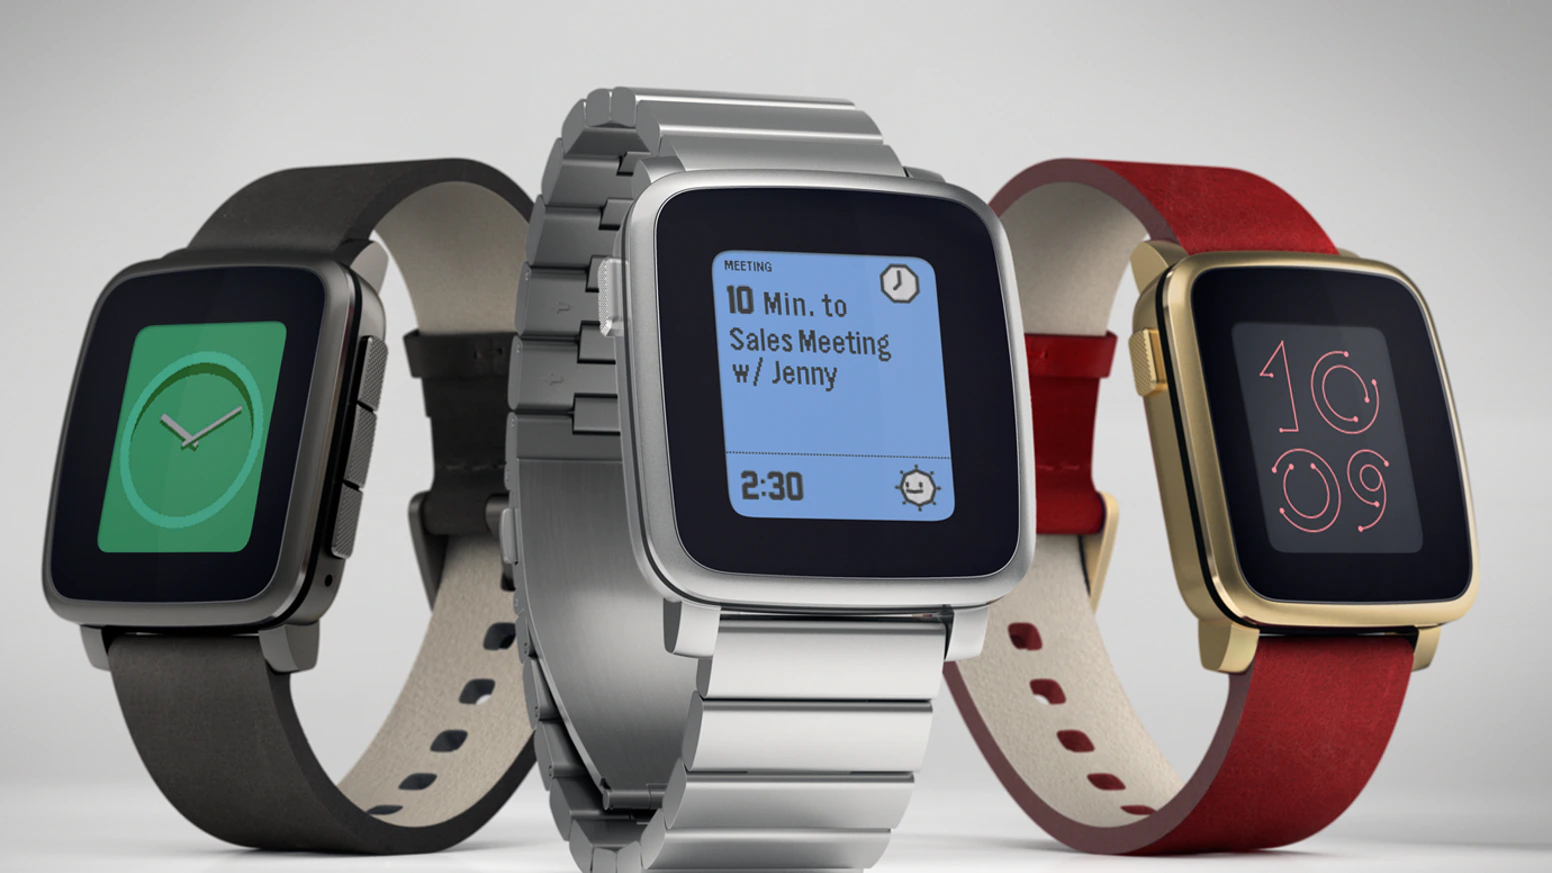

# Top-5 over archieved projects of goals (goal > $1)

In [51]:
max_goal =1 
top_five_fulfil = ks_data.copy()
top_five_fulfil = top_five_fulfil[top_five_fulfil['usd_goal_real']>max_goal] #limiting to projects that goal is at least $1
top_five_fulfil['Goal fulfil'] = (top_five_fulfil['usd_pledged_real']/ top_five_fulfil['usd_goal_real']) * 100

top_five_fulfil = top_five_fulfil.sort_values(by='Goal fulfil', ascending=False).iloc[0:5].loc[:,['name', 'usd_pledged_real', 'goal','currency', 'usd_goal_real', 'Goal fulfil', 'main_category', 'category', 'state']]

top_five_fulfil['usd_pledged_real'] = top_five_fulfil['usd_pledged_real'].map(lambda par: f'{(par/1000):8,.2f} K$')
top_five_fulfil['usd_goal_real'] = top_five_fulfil['usd_goal_real'].map(lambda par: f'{(par/1000):8,.2f} K$')
top_five_fulfil['Goal fulfil'] = top_five_fulfil['Goal fulfil'].map(lambda par: f'{(par):8,.2f} %')

display(top_five_fulfil)

name  ...       state
290936  Penny Arcade's Podcast, "Downloadable Content"...  ...  successful
367449         Multi-Purpose, All-Occasion Greeting Cards  ...  successful
373935                                       Potato Salad  ...  successful
49321                         Suburban Legends: New Album  ...  successful
314527                High Fiction Buys a Coffee for Dave  ...  successful

[5 rows x 9 columns]

Insight: very small projects such as a song, some of them got pledged in multiplies of goals

Checking the first project for double verification: https://www.kickstarter.com/projects/pennyarcade/penny-arcades-podcast-downloadable-content-the-ret?ref=discovery&term=Penny%20Arcade%27s%20Podcast%2C%20%22Downloadable%20Content%22.

Checking on 373935 "Potato Salad"  Potato Salad project was started as a joke and the project was introduced to mass-media

https://www.polygon.com/2016/7/17/12208840/potato-salad-kickstarter-cookbook-zack-danger-brown

Kickstarter analyzed this project: https://www.kickstarter.com/blog/potato-salad-by-the-numbers


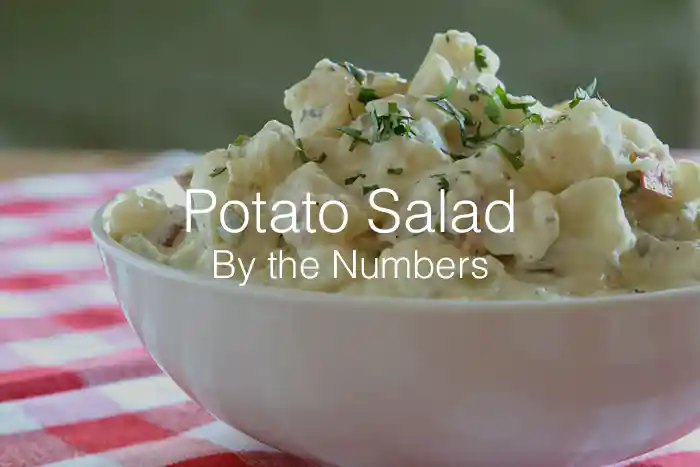

# Very small projects (goal < $1)  

In [52]:
max_goal = 1
small_goal_projects = ks_data.copy()
small_goal_projects = small_goal_projects[small_goal_projects['usd_goal_real']<max_goal] #limiting to projects that goal less than $1
small_goal_projects.shape
small_goal_projects['Goal fulfil'] = (small_goal_projects['usd_pledged_real']/ small_goal_projects['usd_goal_real']) * 100
print(f"There are {len(small_goal_projects)} projects with less than {max_goal} (USD) goal")

#small_goal_projects = small_goal_projects.sort_values(by='Goal fulfil', ascending=False).iloc[0:].loc[:,['name', 'usd_pledged_real', 'goal','currency', 'usd_goal_real', 'Goal fulfil', 'main_category', 'category', 'state']]
#small_goal_projects = small_goal_projects.sort_values(by='currency', ascending=False).iloc[0:].loc[:,['name', 'usd_pledged_real', 'goal','currency', 'usd_goal_real', 'Goal fulfil', 'main_category', 'category', 'state']]
small_goal_projects = small_goal_projects.sort_values(by='main_category', ascending=False).iloc[0:].loc[:,['name', 'usd_pledged_real', 'goal','currency', 'usd_goal_real', 'Goal fulfil', 'main_category', 'category', 'state']]
small_goal_projects.sample(3)


There are 38 projects with less than 1 (USD) goal


name  ...       state
377441                   SWEET LITTLE BITTER by BAD REED  ...  successful
348036                               Nothing (Suspended)  ...   suspended
240071  3mm Aluminum Pick Plector with Variable Geometry  ...      failed

[3 rows x 9 columns]

# Projects with less than $10 goal

There are 779 projects with less than 10 (USD) goal



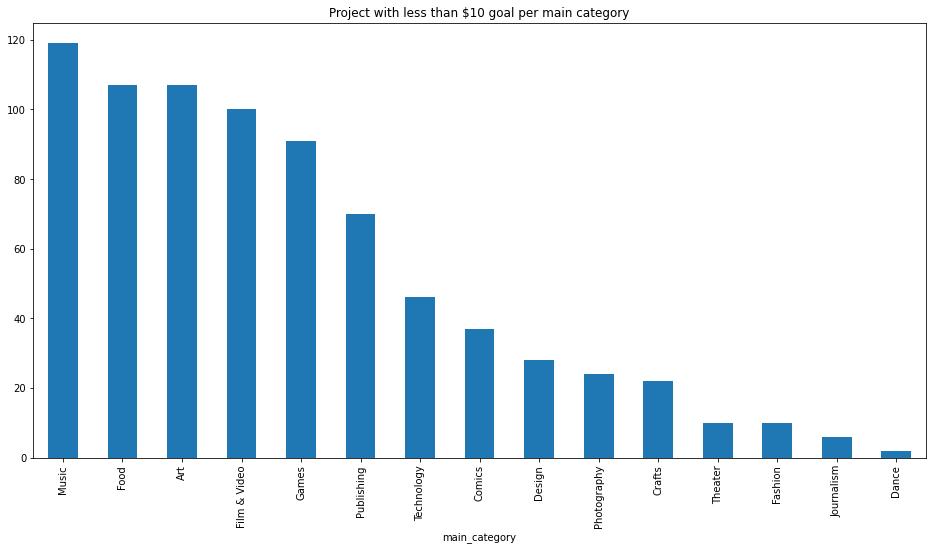

In [53]:
max_goal = 10
small_goal_projects = ks_data.copy()
small_goal_projects = small_goal_projects[small_goal_projects['usd_goal_real']<max_goal] #limiting to projects that goal less than $1
small_goal_projects.shape
small_goal_projects['Goal fulfil'] = (small_goal_projects['usd_pledged_real']/ small_goal_projects['usd_goal_real']) * 100
print(f"There are {len(small_goal_projects)} projects with less than {max_goal} (USD) goal")

#small_goal_projects = small_goal_projects.sort_values(by='Goal fulfil', ascending=False).iloc[0:20].loc[:,['name', 'usd_pledged_real', 'goal','currency', 'usd_goal_real', 'Goal fulfil', 'main_category', 'category', 'state']]
#small_goal_projects = small_goal_projects.sort_values(by='currency', ascending=False).iloc[0:20].loc[:,['name', 'usd_pledged_real', 'goal','currency', 'usd_goal_real', 'Goal fulfil', 'main_category', 'category', 'state']]
#small_goal_projects = small_goal_projects.sort_values(by='main_category', ascending=False).iloc[0:].loc[:,['name', 'usd_pledged_real', 'goal','currency', 'usd_goal_real', 'Goal fulfil', 'main_category', 'category', 'state']]
small_goal = small_goal_projects.groupby('main_category')
print()
#display(small_goal.name.count().sort_values(ascending = False))
small_goal.name.count().sort_values(ascending = False).plot(kind = 'bar', figsize = (16 ,8), title = 'Project with less than $10 goal per main category')

Insight: Music and Food are leading categories for less than 10 USD goal projects

# Top-5 highest-goal projects

In [54]:
top_five_goal = ks_data.sort_values(by='usd_goal_real', ascending=False).iloc[0:5].loc[:,['name', 'usd_pledged_real', 'usd_goal_real', 'main_category', 'category', 'state']]
top_five_goal.insert(top_five_goal.columns.get_loc("usd_goal_real")+1,'Goal fulfil', None)
top_five_goal['Goal fulfil'] = (top_five_goal['usd_pledged_real']/ top_five_goal['usd_goal_real']) * 100

top_five_goal['usd_pledged_real'] = top_five_goal['usd_pledged_real'].map(lambda par: f'{(par/1000):8,.2f} K$')
top_five_goal['usd_goal_real'] = top_five_goal['usd_goal_real'].map(lambda par: f'{(par/1000):8,.2f} K$')
top_five_goal['Goal fulfil'] = top_five_goal['Goal fulfil'].map(lambda par: f'{(par):8,.2f} %')

display(top_five_goal)

name  ...   state
47803           FUCK Potato Salad. Paleo Potato Brownies!  ...  failed
196531                                 A Celtic Lovestory  ...  failed
367928  Hydroponic's Skyscraper(un gratte-ciel hydropo...  ...  failed
222208  DER NEANDERTALER (Kinofilm mit Starbesetzung i...  ...  failed
226161                Kitchen from Austria in Switzerland  ...  failed

[5 rows x 7 columns]

# Kickstarter successful pledged year over year

Pledged per Month Cumulative Pledged
Month Year                                     
2009-04              0.03 M$            0.03 M$
2009-05              0.09 M$            0.12 M$
2009-06              0.11 M$            0.23 M$
2009-07              0.13 M$            0.36 M$
2009-08              0.25 M$            0.61 M$
...                      ...                ...
2017-08             43.70 M$        2,877.83 M$
2017-09             58.19 M$        2,936.03 M$
2017-10             56.59 M$        2,992.61 M$
2017-11             38.96 M$        3,031.58 M$
2017-12              2.09 M$        3,033.66 M$

[105 rows x 2 columns]

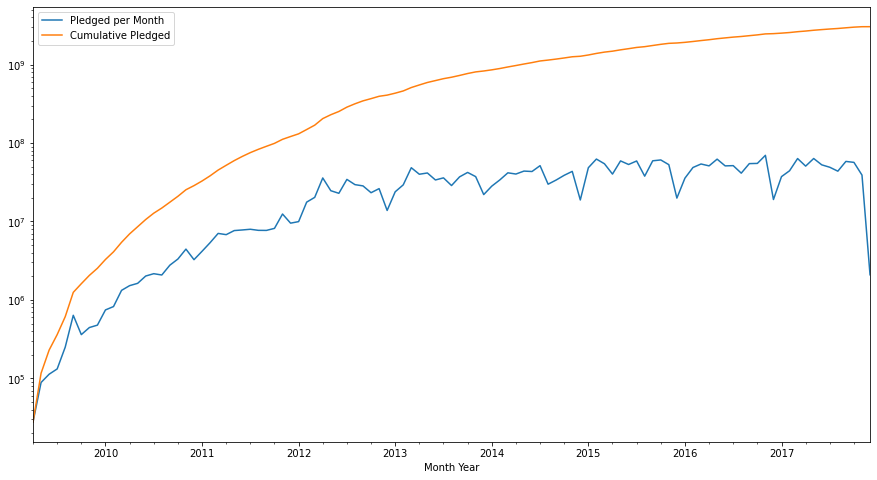

In [55]:
ks_data_successful = ks_data[(ks_data['state'] == 'successful')].copy()
ks_data_successful['Month Year'] = ks_data_reduced_states['launched'].dt.to_period('M')
ks_successful_date_grouped = ks_data_successful.groupby(['Month Year']).apply(lambda grp: pd.Series([
                                                                                grp['usd_pledged_real'].sum()], 
                                                                        index=['Pledged per Month']))

ks_successful_date_grouped['Cumulative Pledged'] = ks_successful_date_grouped['Pledged per Month'].cumsum()
ks_successful_date_grouped.plot(logy=True)

ks_successful_date_grouped['Pledged per Month'] = ks_successful_date_grouped['Pledged per Month'].map(lambda par: f'{(par/1000000):6,.2f} M$')
ks_successful_date_grouped['Cumulative Pledged'] = ks_successful_date_grouped['Cumulative Pledged'].map(lambda par: f'{(par/1000000):6,.2f} M$')
display(ks_successful_date_grouped)

Insight: real projects delivering real revenues to the website. 2009 - 2012 is a rampe-up period, from 2012 to 2018 a steady revenue.

Insight: the projects that ask for too high goal, failed

#(insight-6) Average pledge per backers over time 

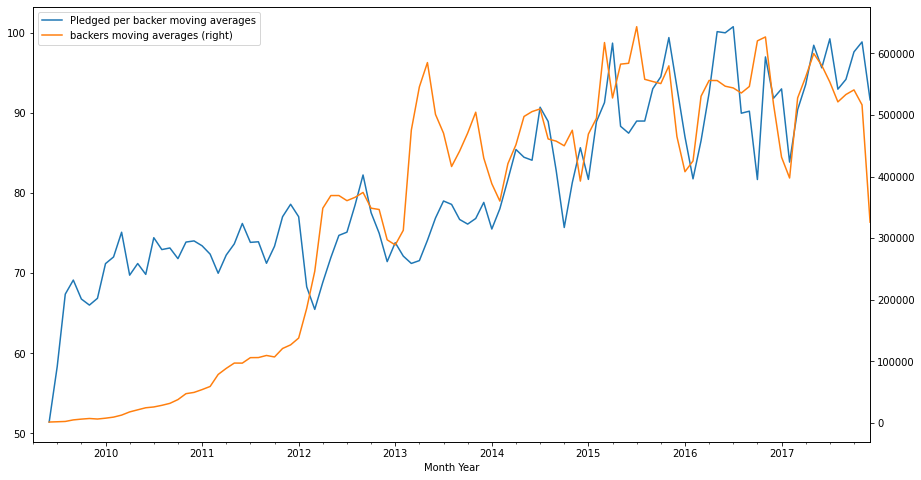

In [56]:
plt.rcParams['figure.figsize'] = [15, 8]

ks_successful_date_grouped = ks_data_successful.groupby(['Month Year']).apply(lambda grp: pd.Series([
                                                                                 grp['backers'].sum(),                    
                                                                                (grp['usd_pledged_real'].sum() / grp['backers'].sum()) ], 
                                                                        index=['Backers sum', 'Average Pledged per backer per Month']))

ks_successful_date_grouped['Pledged per backer moving averages'] = ks_successful_date_grouped['Average Pledged per backer per Month'].rolling(window=3).mean()
ks_successful_date_grouped['backers moving averages'] = ks_successful_date_grouped['Backers sum'].rolling(window=3).mean()


ks_successful_date_grouped.plot(y=['Pledged per backer moving averages', 'backers moving averages'], secondary_y=['backers moving averages'])


Insight: the average investment for successful project per backer went up from about USD 70 to about USD 95. In this period the number of backers went up sharply. This means the revenue came from the number of backers.

# Average pledge per backers for category

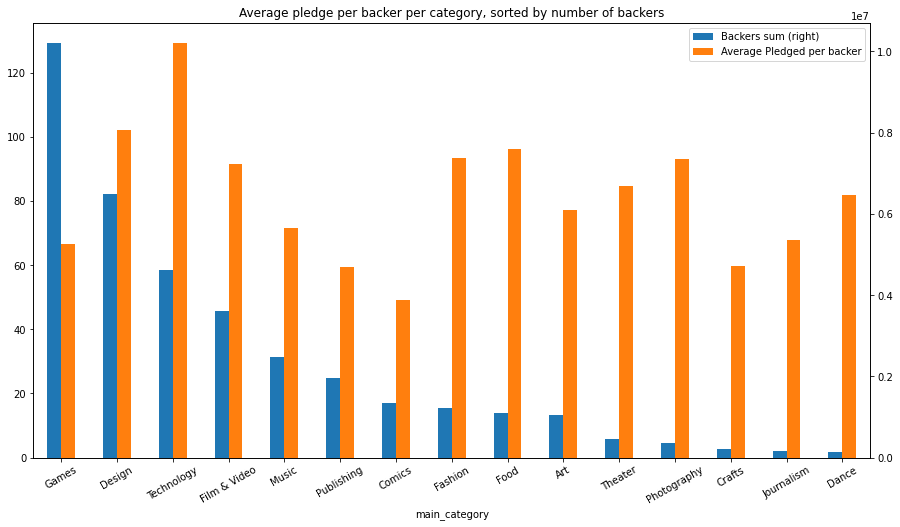

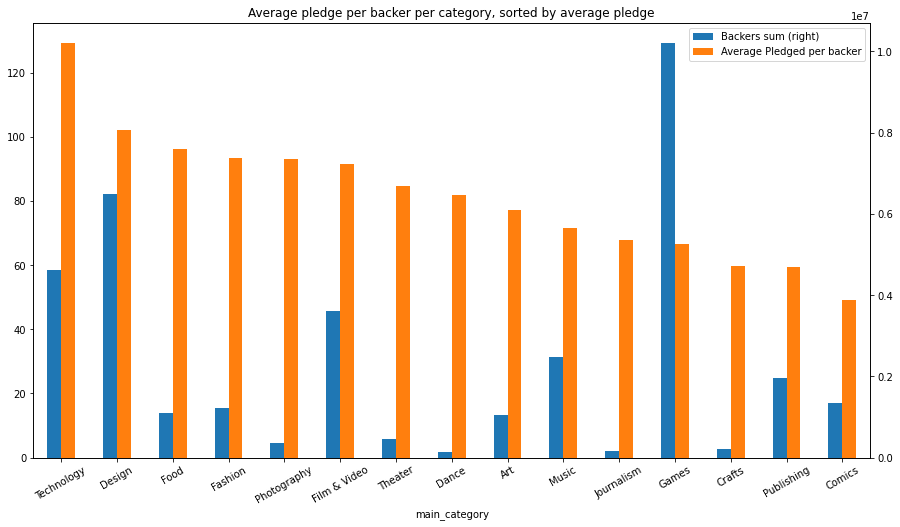

In [57]:
plt.rcParams['figure.figsize'] = [15, 8]

ks_successful_category_grouped = ks_data_successful.groupby(['main_category']).apply(lambda grp: pd.Series([
                                                                                 grp['backers'].sum(),                    
                                                                                (grp['usd_pledged_real'].sum() / grp['backers'].sum()) ], 
                                                                        index=['Backers sum', 'Average Pledged per backer']))

ks_successful_category_grouped.sort_values(by='Backers sum', ascending=False).plot(kind='bar', secondary_y=['Backers sum'], rot=30, title = 'Average pledge per backer per category, sorted by number of backers')
ks_successful_category_grouped.sort_values(by='Average Pledged per backer', ascending=False).plot(kind='bar', secondary_y=['Backers sum'], rot=30, title = 'Average pledge per backer per category, sorted by average pledge')


# Average pledge per backers for country

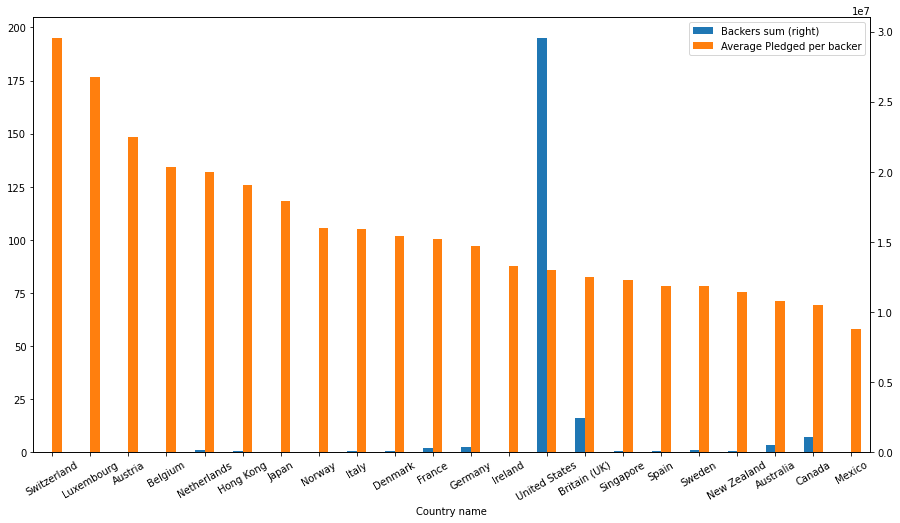

In [58]:
plt.rcParams['figure.figsize'] = [15, 8]
ks_successful_country_grouped = ks_data_successful.groupby(['Country name']).apply(lambda grp: pd.Series([
                                                                                 grp['backers'].sum(),                    
                                                                                (grp['usd_pledged_real'].sum() / grp['backers'].sum()) ], 
                                                                        index=['Backers sum', 'Average Pledged per backer']))

# ks_successful_country_grouped.sort_values(by='Backers sum', ascending=False).plot(kind='bar', secondary_y=['Backers sum'])
ks_successful_country_grouped.sort_values(by='Average Pledged per backer', ascending=False).plot(kind='bar', secondary_y=['Backers sum'], rot=30)


Insight: projects in Switzerland get higher average pledge than Mexico

# Average pledge Country VS Category

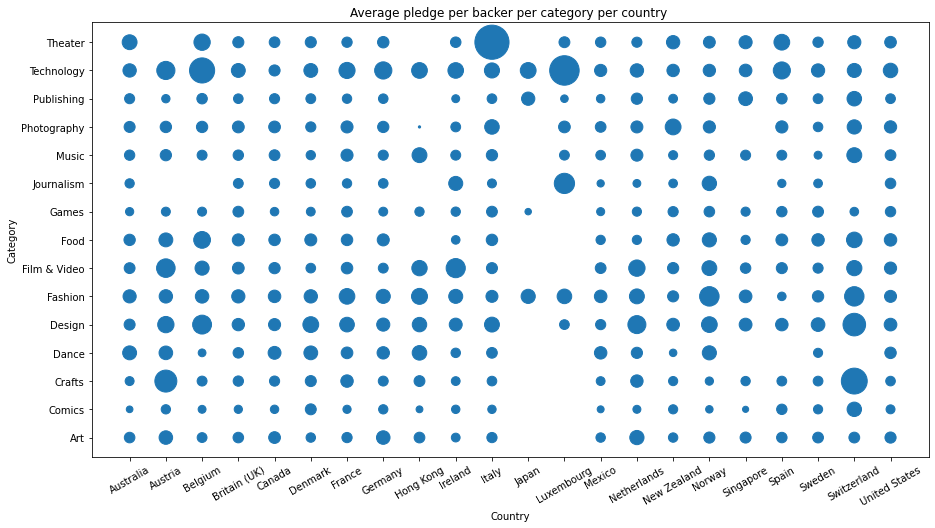

In [59]:
plt.rcParams['figure.figsize'] = [15, 8]
ks_successful_country_category_grouped = ks_data_successful.groupby(['Country name', 'main_category']).apply(lambda grp: pd.Series([
                                                                                 grp['backers'].sum(),                    
                                                                                (grp['usd_pledged_real'].sum() / grp['backers'].sum()) ], 
                                                                        index=['Backers sum', 'Average Pledged per backer']))

ks_successful_country_category_grouped['Country'] = ks_successful_country_category_grouped.index.get_level_values(0)
ks_successful_country_category_grouped['Category'] = ks_successful_country_category_grouped.index.get_level_values(1)

ks_successful_country_category_grouped.plot(kind='scatter', x='Country', y='Category', rot=30, s=ks_successful_country_category_grouped['Average Pledged per backer']*1.6, title = 'Average pledge per backer per category per country ')


# Map view

# Preparation (Installations)

In [60]:
!pip install -U pygal_maps_world # -U for upgrade to latest

     |████████████████████████████████| 270 kB 5.4 MB/s 
     |████████████████████████████████| 127 kB 60.9 MB/s 
  Created wheel for pygal-maps-world: filename=pygal_maps_world-1.0.2-py3-none-any.whl size=278561 sha256=eaf5519821e15b23da3ca6f18cec6df48b4f34fee27d48f1c5aa65d9f79956c0
  Stored in directory: /root/.cache/pip/wheels/54/e6/11/5be0d3206bdc0ea8f0fcf1fe32661d7e614863c8b6a22655ae
Successfully built pygal-maps-world


In [61]:
!pip install -U geopandas

     |████████████████████████████████| 994 kB 5.2 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.3 MB 40.1 MB/s 


In [62]:
!pip install -U folium

     |████████████████████████████████| 94 kB 2.1 MB/s 
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.12.1 which is incompatible.


In [63]:
import pygal
import folium
import geopandas as gpd
%matplotlib inline


# Using GeoPandas

In [64]:
#https://www.geeksforgeeks.org/plotting-geospatial-data-using-geopandas/
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world.sample(5)


In [65]:
# list of country codes: https://www.iban.com/country-codes
url = 'https://www.iban.com/country-codes'
codes = pd.read_html(url)
#codes
country_codes = codes[0]
#country_codes

In [66]:
merged = world.merge(country_codes, left_on = 'name', right_on ='Country' )
#merged#.plot()

In [67]:
ks_country_for_geopanda  = ks_country_grouped_unstack.copy()
ks_country_for_geopanda.reset_index(inplace = True)
#ks_country_for_geopanda.sample(3)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


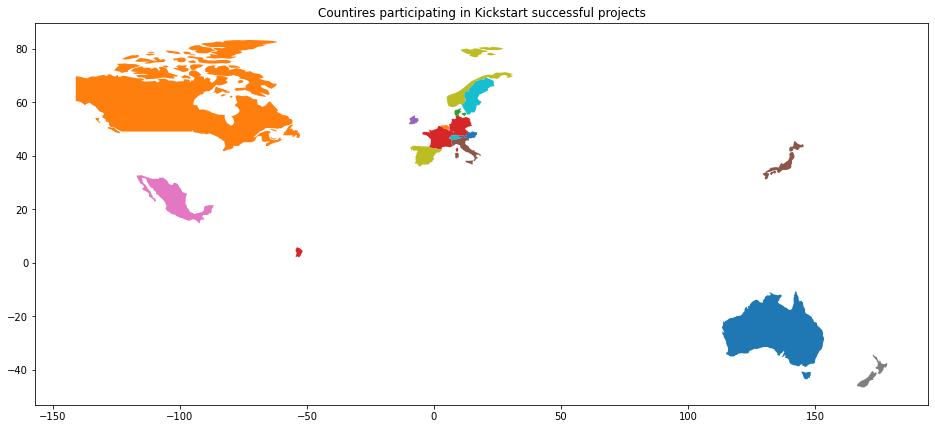

In [68]:
merged_success = merged.merge(ks_country_for_geopanda, left_on = 'Alpha-2 code', right_on ='country' )
#display(merged_success.sample(2))
merged_success.plot(column='name', figsize =(16, 8))
plt.title ('Countires participating in Kickstart successful projects');


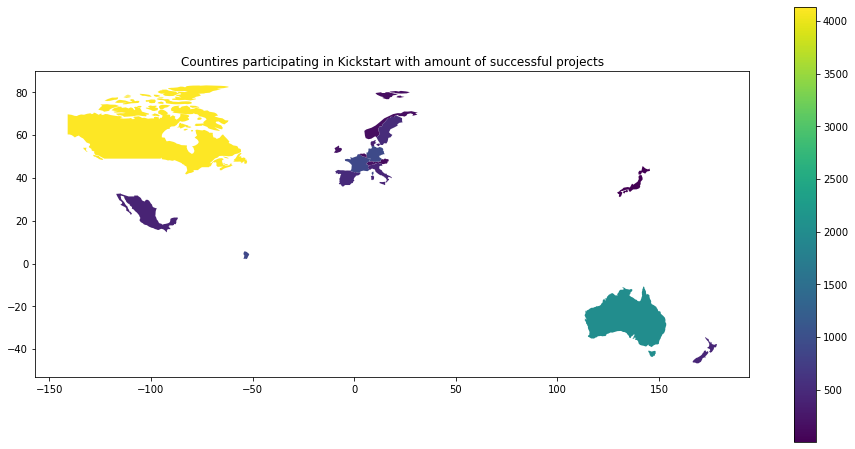

In [69]:
#display (merged_success.columns)
merged_success.columns = ['pop_est',             'continent',
                          'name',                'iso_a3',
                          'gdp_md_est',          'geometry',
                          'Country',             'Alpha-2 code',        
                          'Alpha-3 code',        'Numeric',             
                          'country-2',           'Count_canceled',      
                          'Count_failed',        'Count_successful',    
                          'Total_Count',         'Percent_Successful']
#display (merged_success.columns)
merged_success.plot(column='Count_successful', figsize =(16, 8), legend=True )
plt.title ('Countires participating in Kickstart with amount of successful projects');


# Using Folium

In [70]:
import pandas as pd
import folium
import geopandas

In [71]:
# Create a map
my_map = folium.Map()

# Add the data
folium.Choropleth(
    geo_data=merged_success,
    name='choropleth',
    data=merged_success,
    columns=['Country', 'Count_successful','Percent_Successful'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Kickstarter Successful Projects'
).add_to(my_map)
my_map.save('kickstart.html')
my_map

# Boxplot backers

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)



Total Number of successful projects 133851
Number of successful projects with number of backers beetween 400-1000: 8824
Number of successful projects with number of backers beetween 400-200000: 14743



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


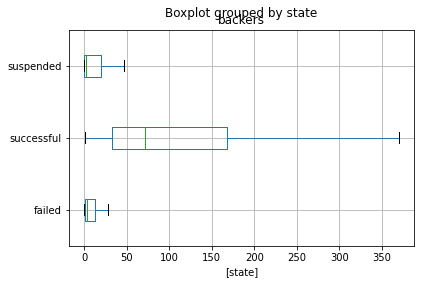

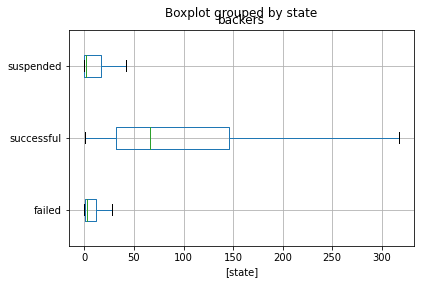

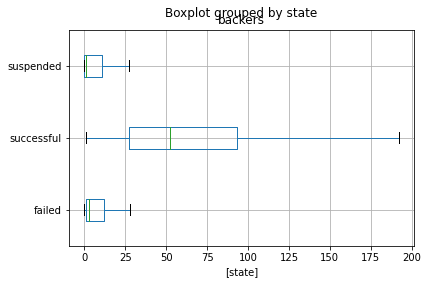

In [84]:
ks_reduced_states = ks[(ks.state == 'successful') | (ks.state == 'failed') | (ks.state == 'suspended')]
ks_reduced_states.boxplot(by=['state'], column=['backers'], vert=False, showfliers=False);

limit_backers_number = 1000
ks_limited = ks_reduced_states.loc[ks_reduced_states.backers <= limit_backers_number ]
#display(ks_limited)
#print(f"Total number of reduced states projects: {len(ks_reduced_states)}")
#print(f"Number of projects with up to {limit_backers_number} backers: {len(ks_limited)}")
print()
print(f"Total Number of successful projects {len(ks[ks.state == 'successful'])}")
print(f"Number of successful projects with number of backers beetween 400-{limit_backers_number}: {len(ks[(ks.state == 'successful') & (ks.backers > 400) & (ks.backers < limit_backers_number)])}")
print(f"Number of successful projects with number of backers beetween 400-{200000}: {len(ks[(ks.state == 'successful') & (ks.backers > 400) & (ks.backers < 200000)])}")
print()
#print(f"Number of suspended projects {len(ks[ks.state == 'suspended'])}")
#print(f"Number of suspended projects with number of backers beetween 100-{limit_backers_number}: {len(ks[(ks.state == 'suspended') & (ks.backers > 100) & (ks.backers < limit_backers_number)])}")
#print(f"Number of failed projects {len(ks[ks.state == 'failed'])}")
#print(f"Number of failed projects with number of backers beetween 100-{limit_backers_number}: {len(ks[(ks.state == 'failed') & (ks.backers > 100) & (ks.backers < limit_backers_number)])}")
ks_limited.boxplot(by=['state'], column=['backers'], vert=False, showfliers=False);

limit_backers_number = 200
ks_limited = ks_reduced_states.loc[ks_reduced_states.backers <= limit_backers_number ]
ks_limited.boxplot(by=['state'], column=['backers'], vert=False, showfliers=False);
#ks_limited.violinplot(by=['state'], column=['backers'], vert=False)

#ks.groupby('state').apply(lambda grp: pd.Series(grp.backers.sum(), index=['Number of Backers']))
#ks.sort_values(by='backers', ascending=True).loc[:,['name','backers', 'state']]

Insight: in most of the successful projects the number of backers is up to 350. In suspended and failed projects the number of backers is much smaller (less than 25)